In [41]:
from IPython.display import display, Latex
from IPython.core.display import HTML
%reset -f
%matplotlib inline
%autosave 300
from matplotlib.pylab import *
#from time import clock
#importation des bibliothèques utiles
from scipy.sparse.linalg import spsolve
from scipy.sparse import  spdiags

Autosaving every 300 seconds


<font size="5">
    
***Outils numériques pour des modèles d'EDP issus de problèmes physiques***
<font size="4">

- 14 séances de 3h
    - 50% cours et TP découverte
    - 50% réalisation de projets
- Overview des EDP intervenant dans différents domaines de la physique
    - EDP elliptiques
    - EDP paraboliques
    - EDP dispersives
    - EDP hyperboliques d'ordre 2 (ondes)
    - les EDP hyperboliques générales et nonlinéaires sont traitées dans un cours spécifique (Mme Faccanoni)
- Overview des outils d'analyse numérique pour approcher les EDP considérées
- Beaucoup de rappels pour tout remettre en ordre
- Démos de code en python3
- Compléments de Fortran90 pour projets en Fortran90

# Introduction
## Rappel d'analyse
### Espace de fonctions
Soit $\Omega\subset \mathbb R^n$ ouvert, soit $f:\Omega\to \mathbb R$, on peut choisir $f$ plus ou moins régulière, $f\in \mathcal C^\infty(\Omega)$, ou $f\notin \mathcal C^0(\Omega)$, $f\in L^1(\Omega)$...

L'appartenance à l'espace découle de la norme finie définie pour l'espace. Les espaces de fonctions sont en général de dimension infinie (sauf en numérique!), les normes ne sont pas nécessairement équivalentes ($N_2(u)\le c N_1(u)\le c'N_2(u)$).
Exemples:
- $\|f\|_{L^p(\Omega)}^p=\int_\Omega |f|^p dx$ (dérive d'un produit scalaire si $p=2$: $\|f\|_{L^2(\Omega)}^2=(f,f)_{L^2(\Omega)}$) 
- $\|f\|_{L^\infty(\Omega)}^p=\sup_\Omega |f|$
- $\|f\|_{H^1(\Omega)}^2=\int_\Omega |f|^2 dx + \sum_{i=1}^n\int_\Omega |\partial_{x_i}f|^2 dx$

**Remarque**: Si on approche les fonctions de ces espaces par des fonctions affines par morceaux sur un maillage donné, l'espace d'approximation ainsi construit est de dimension finie et toutes les normes sont équivalentes. Mais attention, les constantes intervenants dans l'équivalence de norme dépendent du maillage et explosent par raffinement de maillage.

#### Formule de Green
##### Notations
Dans la mesure du possible, on note en minuscule $f$ une fonction à valeur scalaire ($f:\Omega\to \mathbb R$) et $F$ ou $\bf f$ ou $\vec f$ une fonction à valeur vectorielle ($
F:\Omega\to \mathbb R^m$).

On note indifféremment $\partial_i f$, $\partial_{x_i} f$, $\frac {\partial}{\partial x_i} f$ ou encore $f_{x_i}$ la dérivée dans la direction $x_i$:
$$
\partial_{x_i} f(x)=\lim_{h\to 0}\frac {f(x_1,\cdots,x_i+h,x_{i+1},\cdots)-f(x)}{h}.
$$
#### Formule de Green (généralisation de l'IPP)
La formule de Green s'écrit (pour des fonctions suffisament régulières pour donner un sens aux intégrales):
$$
\int_{\Omega} \partial_{x_i} f(x) g(x) \,dx=-\int_{\Omega} \partial_{x_i} g(x) f(x) \,dx+\int_{\partial \Omega} f(x) g(x) {\bf n}_i \,d\gamma,
$$
où $\partial \Omega$ désigne le bord du domaine $\Omega$, ${\bf n}_i$ est la $i$-ème composante de la normale unitaire sortante au domaine et $d\gamma$ désigne la mésure du bord $\partial \Omega$.

En particulier, en dimension $n=1$, on retrouve la formule de l'intégration par partie puisque ${\bf n}_1=+1$ sur le bord droit de $\Omega =]a,b[$, ${\bf n}_1=-1$ sur le bord gauche de $\Omega =]a,b[$ et la mesure du bord est l'évaluation aux points du bord:
$$
\int_{\partial \Omega} f(x) g(x) {\bf n}_i \,d\gamma=f(b)g(b)-f(a)g(a).
$$
### Opérateurs différentiels
#### Définition Gradient, divergence, laplacien, rotationnel
- L'opérateur gradient noté $\bf \nabla$ représente le vecteur de toutes les dérivées partielles
    - $f:\Omega \to \mathbb R$
    - ${ \nabla} f:\Omega \to  \mathbb R^n$
    - ${ \nabla} f(x)=(\partial_{x_1} f(x), \partial_{x_2} f(x),\cdots,\partial_{x_n} f(x))^t$
    - Exemples: le champ électrique dérive d'un potentiel $v$: $E=-\nabla v$, un champ de vitesse peut dériver d'un potentiel également (écoulement potentiel).
- L'opérateur divergence opère sur un champ vectoriel de même dimension que $\Omega$ et produit un scalaire
    - $F:\Omega \to \mathbb R^n$
    - ${\rm div } F=\nabla \cdot F= \sum_{i=1}^n \partial_{x_i} F_i(x)$
    - En électrostatique ${\rm div } E=\frac {\rho}{\epsilon_0}$
    - En mécanique des fluides: l'incompressibilité du fluide est décrit par ${\rm div } ~\bf u$ où $\bf u$ est le champ de vitesse (description Eulérienne).
- L'opérateur laplacien se note $\Delta$
    - $\Delta=\nabla \cdot \nabla =\sum_{i=1}^n \partial^2_{x_i}  $
    - exemple en électrostatique $-\Delta~ V= \frac {\rho}{\epsilon_0}$
    -exemple en mécanique: un écoulement potentiel incompressible s'obtient par résolution de $-\Delta ~\phi=0$ (après ajout de conditions limites) et $\bf u= \nabla \phi$.
- L'opérateur rotationnel (curl en anglais) s'applique à un champ vectoriel de $\mathbb R^3$ opérant sur $\Omega \subset \mathbb R^3$.
    - $F:\Omega\subset \mathbb R^3\to \mathbb R^3$
    - ${\rm rot} ~ F= {\rm curl} ~ F = \nabla \times F$
    - ${\rm rot} ~F=\left [\begin {matrix} \partial_2 F_3-\partial_3 F_2\\
                                        \partial_3 F_1-\partial_1 F_3\\
                                        \partial_1 F_2-\partial_2 F_1 
                    \end {matrix}\right ]$
- Cette opérateur intervient en électromagnétisme dans les équations de Maxwell
$$
\begin {cases}
&\partial_t B+\nabla_x \times E=0\\
&\partial_t E-c^2\nabla_x \times B=-\partial_t p.
\end {cases}
$$
- Il intervient en mécanique des fluides pour décrire le vecteur tourbillon ou vorticité (dont la direction est l'axe du tourbillon et la magnitude la vitesse angulaire): $\nabla \times \bf u$ où $\bf u$ est la vitesse du fluide.
    
On peut étendre les opérateurs opérant sur des scalaires à des opérateurs opérant sur des vecteurs en les définissant composante par composante.
De même, les opérateurs opérant sur des vecteurs à des opérateurs opérant sur des tenseurs d'ordre 2 en les définissant composante par composante.
    
L'opérateur Laplacien opérant sur $\Omega\subset \mathbb R^3$ à valeur $\mathbb R^3$ peut se décomposer ainsi:
$$
\Delta F =-\nabla\times \nabla\times F+\nabla \nabla \cdot F
$$
</font>


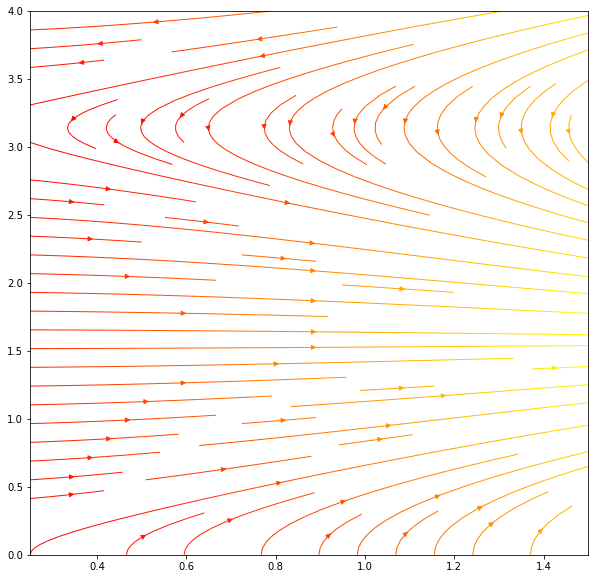

In [42]:
#EXEMPLE D'ECOULEMENT POTENTIEL
def u1(x,y):
    #phi(x,y)=x^2sin(y)
    #partial_x phi=2xsin(y)
    return 2*x*sin(y)
def u2(x,y):
    #phi(x,y)=x^2sin(y)
    #partial_y phi=x^2cos(y)
    return x**2*cos(y)

X,Y=meshgrid(linspace(0.25,1.5,200),linspace(0,4,200))
U1=u1(X,Y)
U2=u2(X,Y)
figure(figsize=(10,10))
streamplot(X, Y, U1, U2,color=sqrt(U2**2+U1**2), linewidth=1, cmap='autumn');



<font size="4">  
    
#### Formules remarquables
Il faut se méfier de l'extension des résultats de fonction d'une seule variable. Si $f'=0$ sur un intervalle alors $f$ est constant sur cet intervalle. En dimension supérieur, il faut être vigilent quant à l'opérateur de dérivation considéré.

**Propriété**: Pour tout $f:\Omega \to \mathbb R$ régulière, alors $\nabla \times \nabla f=0$

Cette propriété est immédiate par définition de l'opérateur rotationnel. *La réciproque est fort utile*:

**Propriété**: Si $F:\Omega \to \mathbb R^3$ avec $\Omega$ simplement connexe et si $\nabla \times F=0$ sur $\Omega$ alors il existe une fonction scalaire $f:\Omega \to \mathbb R$ tel que 
$$
F=\nabla f.
$$
Autrement dit, $F$ dérive d'un potentiel.

**Remarque**: Une fonction vectorielle prise au hasard n'a aucune raison de dériver d'un potentiel. C'est seulement le cas lorsque son rotationel est nul.

**Propriété**: Si $F:\Omega \to \mathbb R^3$ alors $\nabla \cdot \nabla \times F=0$ 

Cette propriété est immédiate par définition des opérateurs divergence et rotationnel. *La réciproque est encore fort utile*:

**Propriété**: Si $F:\Omega \to \mathbb R^3$ avec $\Omega$ simplement connexe et si $\nabla \cdot F=0$ sur $\Omega$ alors il existe une fonction vectorielle $G:\Omega \to \mathbb R^3$ tel que 
$$
F=\nabla \times G.
$$

**Remarque**: $G$ n'est fixé qu'à un gradient près puisque la divergence d'un rotationel est nulle.

**Remarque**: Lorsqu'un gradient est nul sur une composante connexe, alors la fonction est constante sur cette composante. Il suffit de raisonner composante par composante.

**Propriété**: Il découle des propriétés précédentes qu'un champ de vitesse ${\bf u}:\Omega \to \mathbb R^3$ de 
$(L^{2}(\Omega))^3$ se décompose  en un champ incompressible (donc un pur rotationnel) et un gradient:
$$
{\bf u}=\nabla \times G +\nabla \varphi={\bf u}_{\bot}+\nabla \varphi,
$$
avec $\varphi \in \dot H^1(\Omega)$.
Lorsque le domaine est infini et la décroissance de ${\bf u}$ à l'infini suffisament rapide, on peut choisir une décomposition unique et orthogonale dans $(L^{2}(\Omega))^3$.
Cette décomposition est très utile, elle se nomme décomposition (ou projection) de Hodge ou de Helmotz en électromagnétisme et décomposition de Leray en mécanique des fluides. On appelle ${\bf u}_{\bot}$ le projeté de ${\bf u}$ sur les champ à divergence nulle. Le calcul de cette projection est largement utilisé dans les algorithmes de résolution de Navier-Stokes en écoulement incompressible. On détaillera ce point qui repose sur le calcul de $\varphi$ comme solution d'un problème de Poisson obtenu en prenant la divergence de l'expression ci-dessus et en y ajoutant des conditions limites bien choisies.

### Formules de Green généralisées
On se sert de la seule formule de Green donnée précédemment pour les généraliser aux opérateurs divergence, gradient, rotationnel, laplacien.
$$
\int_{\Omega}\nabla f\cdot G\,dx=-\int_{\Omega}f\nabla \cdot G\,dx
+\int_{\partial \Omega}f G\cdot {\bf n}\,d\gamma.
$$
En effet,
$$
\int_{\Omega}\partial_i f G_i\,dx=-\int_{\Omega}f \partial_i G_i\,dx
+\int_{\partial \Omega}f G_i {\bf n}_i\,d\gamma
$$
et par sommation sur $i$, on obtient le résultat.
En écrivant le laplacien comme la divergence du gradient, on a également,
$$
\int_{\Omega}\Delta f \, g\,dx=\int_{\Omega}\nabla\cdot \nabla f \, g\,dx=-\int_{\Omega}\nabla f\cdot\nabla  g\,dx
+\int_{\partial \Omega}g \nabla f\cdot {\bf n}\,d\gamma.
$$
On a encore
$$
\int_{\Omega}\nabla \times F \cdot G\,dx=\int_{\Omega}\nabla \times G \cdot F\,dx
+\int_{\partial \Omega}{\bf n} \times F \cdot {G}\,d\gamma.
$$
### Overview des problèmes à aborder
#### Elliptique
- Diffusion stationnaire
    - diverses conditions limites
    - diffusion anisotrope
- Domaine application
    - diffusion chimique... diverses
    - electrostatique
    - écoulement potentiel incompressible
    - Stokes incompressible stationnaire
    - anisotropie par fluide inhomogène
    - écoulement incompressible, méthode de projection
    - elasticité linéaire stationnaire

#### Parabolique
- Problème d'évolution 
- Diffusion instationnaire
    - diverses conditions limites
    - diffusion anisotrope
- Stokes instationnaire incompreesible
- Navier-Stokes instationnaire incompreesible
- Propage l'information à vitesse infinie
    
#### Equations Dispersives
- Problème d'évolution 
- Equation de Schrödinger
- Equation de KdV, BBM...
- quantités conservées
- Propage l'information à vitesse infinie

#### Equation des ondes
- Problème d'évolution 
- Ondes electromagnétiques
- Ondes en elasticité linéaire
- Ondes acoustiques en mécanique des fluides
- quantités conservées
- Propage l'information à vitesse finie
</font>

<font size="4">
    
## Problèmes aux limites elliptiques

Le but est de revisiter les problèmes de type diffusion comme l'opérateur laplacien sur domaine borné. On se limitera ici aux opérateurs d'ordre 2 éventuellement à coefficients non constants et pour différentes conditions limites. On rangera dans cette famile d'opérateur tous ceux qui admettent une formulation faible que satisfait le théorème de Lax-Milgram.
### Rappel formulation faible et Lax-Milgram
**Théorème Lax-Milgram** : On se donne
- un espace de Hilbert V muni de la norme $\|.\|$
- une forme bilinéaire $a$ sur $V\times V $ continue ($a(u,v)\le C\|u\| \|v\|$) et $V$-elliptique ($\exists C>0$ tel que pour tout $u\in V$, $a(u,u)\ge C\|u\|^2 $)
- une forme linéaire $l$ continue sur $V$.
La formulation variationnelle ou formulation faible s'écrit:

Trouver $u\in V$ tel que pour tout $v\in V$, $ a(u,v)=l(v)$.

<span style="color:blue"> Sous les hypothèses précédetentes, il existe une unique solution à la formuation faible.</span>


La capacité à écrire une formulation faible sans se tromper sur le choix de l'espace des fonctions tests est supposée acquise. 

Quelques clés pour se faire:
- Multiplier par une fonction test et utiliser les formules de Green
- Exploiter (remplacer) les conditions limites portant sur l'inconnue
- Pour les termes de bord restant génants pour la coercivité, rajouter l'information de la condition limite (homogène!) dans l'espace et procéder à un relèvement si la condition est inhomogène
- Traiter les systèmes par différentes fonctions tests pour chaque équation scalaire et sommer.


**Pour s'entraîner voici quelques exercices à savoir traiter:**

- Problème de Dirichlet
$$
\begin {cases}
&-\Delta u = f  \text{ sur } \Omega,\\
& u_{|\partial \Omega}=0
\end {cases}
$$
Sa formulation faible : $V=H_0^1(\Omega)=\{v\in H^1(\Omega) \text { tel que } v_{|\partial \Omega}=0  \}$

Trouver $u\in V$ tel que pour tout $v\in V$
$$
\int_{\Omega} \nabla u \cdot \nabla v \,dx= \int_{\Omega} f v\,dx.
$$
- Problème de Neuman
$$
\begin {cases}
&-\Delta u = f  \text{ sur } \Omega,\\
& \partial_n u_{|\partial \Omega}=g
\end {cases}
$$
Sa formulation faible : $V=H^1(\Omega)$

Trouver $u\in V$ tel que pour tout $v\in V$
$$
\int_{\Omega} \nabla u \cdot \nabla v \,dx= \int_{\Omega} f v\,dx.
$$
- Problème de Robin
$$
\begin {cases}
&-\Delta u = f  \text{ sur } \Omega,\\
& \partial_n u_{|\partial \Omega}+ a u =g
\end {cases}
$$
Sa formulation faible : $V=H^1(\Omega)$

Trouver $u\in V$ tel que pour tout $v\in V$
$$
\int_{\Omega} \nabla u \cdot \nabla v \,dx+ \int_{\partial \Omega} a u  v \,d\gamma= \int_{\Omega} f v\,dx+ \int_{\partial \Omega} g  v \,d\gamma.
$$

**Quelques clés techniques pour établir les hypothèses du théorèmes de Lax-Milgram**
- utiliser les injections de Sobolev pour contrôler les termes. Par exemple on contrôle une norme Sobolev pour la mesure du bord par la norme Sobolev sur tout l'espace avec un demi-cran (ou plus *a fortiuri*) de régularité en plus
- utiliser l'inégalité de Poincaré si nécessaire pour la coercivité ou $V$-ellipticité quand on peut: c'est faux dans $H^1$, vrai dans $H_0^1$, vrai dans $\dot H^1$.

### Le problème de Neumann
Ce problème peut être issu d'un problème de thermique en régime stationnaire avec des parois parfaitement isolante (cas Neumann homogène). Intuitivement, on comprend de suite qu'une solution stationnaire n'est possible, alors qu'il n'y a aucun échange de chaleur avec l'extérieur, que si le terme source est globalement neutre en terme d'apport de chaleur (terme source à moyenne nulle). On verra  à quel moment cette hypothèse est mathématiquement nécessaire.

Une autre motivation de ce problème est l'application en mécanique des fluides ou électromagnétisme lorsqu'il sera nécessaire de projeter un champ de vitesse sur les champ à divergence nulle.

Soit $\Omega\subset \mathbb R^d$ ($d=2$ ou $3$ en pratique). On suppose donné un champ de vitesse $\bf u\in (L^2(\Omega))^d$ .
La décomposition de Hodge ou Leray stipule qu'il existe un unique $\varphi\in (\dot H^1(\Omega))^d$ tel que
$$
{\bf u}={\bf u}_\bot +\nabla \varphi, \text{ dans } \Omega,
$$
avec $\nabla \cdot {\bf u}_\bot=0$ dans $\Omega$ avec ${\bf u}_\bot$ le projeté orthogonal de ${\bf u}$ pour la norme de $L^2(\Omega)$ sur les champs à divergence nulle.

Ce projeté est précisément défini par :
$$
\|{\bf u}-{\bf u}_\bot\|_{L^2}=\min_{v\in H}\|{\bf u}-{\bf v}\|
$$
où $H=\{{\bf v} \in (L^2(\Omega))^d, \text{ tel que } \nabla \cdot {\bf v} =0 \}$.

Si on traite un écoulement ${\bf u}$ où $\partial \Omega$ sont des parois imperméables alors ${\bf u}\cdot {\bf n}=0$ et ainsi ${\bf u}$ est à divergence moyenne nulle. En faisant l'hypothèse que ${\bf u}_\bot\cdot {\bf n}=0$, on peut définir un projeté (quitte à perdre l'orthogonalité) aisément puisqu'alors sur le bord:
$$
\nabla \varphi\cdot {\bf n}={\bf u}\cdot {\bf n}-{\bf u}_\bot\cdot {\bf n}=0
$$
si la décomposition est vrai au sens de la trace.
En prenant la divergence de la décomposition et en ajoutant la condition limite obtenue, on a le problème de Poisson :
$$
\begin {cases}
&\Delta \varphi=\nabla \cdot {\bf u} \text{ sur } \Omega,\\
&\partial_n \varphi =0\text{ sur } \partial \Omega.
\end {cases}
$$
On remarque que la condition de compatibilité est satisfaite :
    $$
    \int_{\Omega}\nabla \cdot {\bf u}\, dx=0=\int_{\partial\Omega}\partial_n \varphi\, d\gamma
    $$
Cette condition est nécessaire puisqu'en intégrant l'équation :
    $$
    \int_{\Omega}\Delta{ \varphi}\, dx=\int_{\Omega}\nabla \cdot {\bf u}\, dx=0
    $$
et que 
    $$
 \int_{\Omega}\Delta{ \varphi}\, dx=   \int_{\partial\Omega}\partial_n \varphi\, d\gamma.
    $$
    
Cherchons la formulation faible du problème, on multiplie par $\psi$ et on intègre  :
    $$
    \int_{\Omega} \nabla \varphi \cdot \nabla \psi \,dx+ \int_{\partial \Omega} 0   \,d\gamma= \int_{\Omega} f \psi\,dx,
    $$ 
    avec $f=-\nabla \cdot {\bf u}$ à moyenne nulle.
    
   Le choix des fonctions tests pour assurer l'intégrabilité du premier terme est $\psi \in H^1(\Omega)$. Mais on voit que cet espace est trop large pour assurer la coercivité (ellipticité) de la forme bilinéaire (pas d'inégalité de Poincaré). On veut alors se limiter à $\dot H^1(\Omega)$ même si les fonctions régulières à support compact ne sont pas dans cet ensemble. Le théorème de Lax-Milgram va alors s'appliquer aisément, la difficulté est reporté dans l'interprétation de la solution faible pour retrouver la solution faible solution de l'EDP de départ.
    
Pour cela, on remarque qu'une fonction $\psi \in H^1(\Omega)$ se décompose comme
    $$
    \psi =\bar \psi +\frac 1 {|\Omega|}{\int_{\Omega} \psi \, dx}
    $$
    avec $\bar \psi \in \dot H^1(\Omega)$.
 Ainsi la solution dans $\dot H^1(\Omega)$ de,
    $$
    \int_{\Omega} \nabla \varphi \cdot \nabla \bar\psi \,dx= \int_{\Omega} f \bar\psi\,dx, \text { pour tout }\bar\psi \in \dot H^1(\Omega),
    $$ 
    est aussi solution de
    $$
    \int_{\Omega} \nabla \varphi \cdot \nabla \psi \,dx= \int_{\Omega} f \psi\,dx, \text { pour tout }\psi \in  H^1(\Omega),
    $$ 
    puisque le gradient d'une constante est nul et que $f$ multiplié par une constante est à moyenne nulle. C'est ici que l'hypothèse de compatibilité intervient. Si on ne l'avait pas eu, la solution de la formulation faible résoudrait un autre problème.
    
On retrouve donc l'EDP $-\Delta ~\varphi=f$ au sens des distribution en restreignant encore les fonctions tests aux fonctions $\mathcal C^\infty$ à support compact puis on retrouve, 
    $$
    \int_{\Omega} -\Delta \,\varphi ~  \psi \,dx+\int_{\partial\Omega} \partial_n \,\varphi  ~ \psi \,d\gamma= \int_{\Omega} f \,\psi\,dx, \text { pour tout }\psi \in  H^1(\Omega).
    $$ 
Soit finalement :
    $$
    \int_{\partial\Omega} \partial_n \,\varphi   ~\psi \,d\gamma=0, \text { pour tout }\psi \in  H^1(\Omega).
    $$
Ce qui signifie que $\partial_n \,\varphi =0$ au sens du dual de $H^{\frac 1 2}(\partial \Omega)$.
On a ainsi identifié l'unique solution dans $H^1(\Omega)$ du problème de Poisson
    $$
    \begin {cases}
    &-\Delta \,\varphi=f=-\nabla \cdot {\bf u} \text{ sur } \Omega,\\
    &\partial_n \,\varphi =0\text{ sur } \partial \Omega.
    \end {cases}
    $$
</font>

<font size="4">
    
#### Exercice
On se donne un champ de vitesse $\bf u$ régulier ($H^1(\Omega)^2$ par exemple) sur un domaine rectangulaire $\Omega$ tel que $\bf u\cdot \bf n=0$. Montrer que la décomposition de Leray 
$$
{\bf u}={\bf u}_\bot +\nabla \varphi, \text{ dans } \Omega,
$$
avec $\varphi$ solution du problème de Neumann homogène. 

- Montrer que ${\bf u}_\bot$ est bien le projeté orthogonal dans $L^2(\Omega)^2$ sur $V=\{{\bf v} \in H^1(\Omega)^2, \text{ tel que } \nabla \cdot {\bf v} =0 \text{ et }  {\bf v}\cdot {\bf n}=0\}$.

- Proposer une résolution numérique pour le champ ${\bf u}$ de votre choix.

</font>

<font size="4">
    
### Le problème de Stokes incompressible

On cherche à trouver l'état stationnaire d'un fluide incompressible dans un domaine $\Omega\subset \mathbb R^d$ qui satisfait un minimum de puissance associée aux contraintes visqueuses ajoutées à la puissance d'une force agissant sur le fluide. On néglige ici les effets d'inertie. On cherche ${\bf u}$ qui satisfait
$$
\begin {cases}
&    \displaystyle \min_{{\bf v}\in V}J(v)\\
&    \text {avec }J(v)=\int_{\Omega}\frac \mu 2 |\nabla {\bf v}|^2\, -{\bf f}\cdot {\bf v}\,dx\\
&    \text { et }V=\{{\bf v}\in (H_0^1(\Omega)^d, \text { tel que } \nabla \cdot {\bf v}=0\}.
\end{cases}
$$
    
Si on caractérise ce minimum ${\bf u}$ par dérivation de la fonctionnelle, on obtient que ${\bf u}$ est solution de la formulation faible:
    $$
    \mu 
    \int_{\Omega} \nabla {\bf u}\cdot \nabla {\bf v}\,dx =\int_{\Omega} {\bf f}\cdot {\bf v}\,dx, \text{ pour tout } {\bf v}\in V. 
    $$
    Voici une formulation faible pour laquelle une méthode élément fini peut être mise en place. Il est cependant non trivial de fabriquer une base de $V$ compte tenu de la contrainte d'incompressibilité.
    
On va relaxer la contrainte par une méthode de pénalisation et comprendre ainsi ce qu'est la pression dans le problème de Stokes en écoulement incompressible.
    
On considère le problème de minimisation approché suivant :
    $$
    \min_{{\bf v}\in (H_0^1(\Omega)^d}J_\varepsilon(v)=\int_{\Omega}\frac \mu 2 |\nabla {\bf v}|^2\,+\frac 1 {2\varepsilon}|\nabla \cdot {\bf v}|^2\,  -{\bf f}\cdot {\bf v}\,dx,
    $$
dont la solution sera notée ${\bf u}_\varepsilon$. On parle de pénalisation de la contrainte car, dans la fonctionnelle de coût, on rajoute à $J(v)$ le coût, très cher avec $\varepsilon>0$ petit, de l'écart à la divergence nulle. Autrement dit, on a rajouté artificiellement dans la fonctionelle de puissance, une puissance qui mesure chèrement la dilatation ou contraction du fluide. L'optimal sera ainsi atteint pour une divergence du fluide petite avec $\varepsilon>0$ petit dans tout le domaine $\Omega$.

La caractérisation du minimum donne la formulation faible 
    $$
    \mu \int_{\Omega} \nabla {\bf u}_\varepsilon\cdot \nabla {\bf v}\,dx+\frac 1 {\varepsilon}\int_{\Omega} \nabla \cdot{\bf u}_\varepsilon\,\nabla \cdot{\bf v}\,dx =\int_{\Omega} {\bf f}\cdot {\bf v}\,dx, \text{ pour tout }{\bf v}\in (H_0^1(\Omega)^d. 
    $$
    On interprète alors ${\bf u}_\varepsilon$ solution de l'EDP :
    $$
    \begin{cases}
    &    -\mu \Delta {\bf u}_\varepsilon -\frac 1 {\varepsilon} \nabla \nabla \cdot {\bf u}_\varepsilon =f \text{ dans } \Omega,\\
    & {\bf u}_\varepsilon = 0 \text{ sur } \partial \Omega.
    \end {cases}
    $$
**Remarque** : Ici, l'interptétation a été facilitée par l'espace de minimisation qui n'est pas contraint par la divergence.
    
    
Si on pose $p_\varepsilon=-\frac 1 {\varepsilon}\nabla \cdot {\bf u}_\varepsilon$ et si ce scalaire a le bon goût de converger lorsque $\varepsilon\to 0$, on pourra caractériser, à la limite, l'EDP de Stokes en écoulement incompressible faisant intervenir la pression $p$ limite de $p_\varepsilon$.
    
**Remarque** : On a immédiatement que $J_{\varepsilon}({\bf u}_\varepsilon)\le J_{\varepsilon}({\bf u})=J({\bf u})$ ne dépend pas de $\varepsilon$. On en déduit qu'il existe une constant $K$ indépendante de $\varepsilon$ tel que:   
- $\int_\Omega |\nabla \cdot {\bf u}_\varepsilon|^2\,dx\le K \varepsilon$
- $\mu\int_\Omega |\nabla {\bf u}_\varepsilon|^2\,dx\le K$.
   
(preuve: controler le terme du travail de la force à l'aide du terme visqueux et de l'inégalité de Poincaré.)

On en déduit alors que :
- ${\bf u}_\varepsilon$ est bornée uniformément en $\varepsilon$ dans $H_0^1(\Omega)$
- $\nabla {p}_\varepsilon$ est bornée uniformément en $\varepsilon$ dans $H^{-1}(\Omega)$.
- $\nabla \cdot {\bf u }_\varepsilon$ converge fortement vers $0$ dans $L^2(\Omega)$.
    
Par passage à la limite quand $\varepsilon$ tend vers zéro, on obtient
 $$
    \begin{cases}
&    -\mu \Delta {\bf u}_0 + \nabla {p} =f \text{ dans } \Omega,\\
&\nabla \cdot {\bf u}_0 =0\text{ dans } \Omega,\\
& {\bf u}_0= 0 \text{ sur } \partial \Omega.
    \end {cases}
    $$
La limite obtenue en vitesse réalise le minimum de $J$ sur $V$ car $J({\bf u }_\varepsilon)\to J({\bf u })$  et $J({\bf u }_\varepsilon)\to J({\bf u }_0)$ d'où $ \bf u =\bf u _0$.
    
Le couple $( {\bf u},p)$ solution de l'EDP de Stokes incompressible peut être interprété comme le point selle d'un Lagrangien.

**Défintion**: On appelle $( {\bf u},p)\in V\times H$ le point selle du Lagrangien $\mathcal L$ si
    $$
    \mathcal L({\bf u},q)\le \mathcal L({\bf u},p)\le \mathcal L({\bf v},p), \text { pour tout }  ({\bf v},q)\in V\times H.
    $$
avec $\mathcal L$ convexe en la première variable et concave en la deuxième.
    Le couple $( {\bf u},p)\in V\times H$ réalise le minimum en la première variable du maximum en la deuxième variable de $\mathcal L$.

**Propriété**: Le couple $( {\bf u},p)$ solution de l'EDP de Stokes incompressible est l'unique pour selle du Lagrangien  $\mathcal L$ sur $V\times H=(H_0^1(\Omega)^d\times \dot L^2(\Omega)$ avec 
$$
\mathcal L( {\bf u},p)=J({\bf u})+\int_\Omega \nabla p \cdot {\bf u}\,dx.
$$
**Remarque**: Ce formalisme de Lagrangien permet de définir un problème de dualité min-max sur des espaces non contraints et ouvre la porte aux méthodes numériques d'optimisation par dualité. On alterne une recherche de min (méthode de descente ou résolution de l'EDP qui caractérise le min) puis une recherche de max (partielle). Il s'agit de l'algoritme d'Uzawa (recherche du min en ${\bf u}$ à $p$ fixé puis une itération de méthode de gradient à pas fixe dans la deuxième variable) et d'Harrow-Hurvicz (une itération de descente à pas fixe dans la première variable puis dans la deuxième variable). 

**Remarque**: Pour garantir une plus grande vitesse de convergence dans l'algorithme d'Uzawa pour le problème de Stokes, on augmente le Lagrangien par ($r>0$) :
    $$
    \mathcal L_r( {\bf u},p)=\mathcal L( {\bf u},p)+\frac r 2 \int_\Omega |\nabla \cdot {\bf u} |^2\, dx.
    $$
    L'alogorirhme d'Uzawa s'écrit alors, pour le $k$-ème itéré $({\bf u}^k,p^k))$ donné, ${\bf u}^{k+1}$ réalise le minimum de ${\bf u}\to L_r( {\bf u},p^k)$, soit :
    $$
    \begin{cases}
&    -\mu \Delta {\bf u}^{k+1}-r\nabla \nabla\cdot {\bf u}^{k+1} + \nabla {p}^k =f \text{ dans } \Omega,\\
& {\bf u}^{k+1}= 0 \text{ sur } \partial \Omega
    \end {cases}
    $$
    et
    $$
    p^{k+1}=p^k-r\nabla \cdot {\bf u}^{k+1}.
    $$

</font>    

<font size="4">
    
### Méthode de Galerkin
    
On se donne une formulation faible vérifiant les hypothèses du théorème de Lax-Milgram:

Pour tout $v\in V$ (espace de Hilbert), on cherche $u\in V$,
$$
a(u,v)=l(v).
$$
Soit $(v_n)_{n\in \mathbb N}$ une base de $V$. On note $V_m=Vect(v_0,v_1,\cdots, v_{m-1})$.

On peut définir la formulation faible approchée:
Pour tout $v\in V_m$,on cherche $u_m\in V_m$,
$$
a(u_m,v)=l(v).
$$
L'unique solution $u_m\in V_m$ est une approximation de $u$ grâce au lemme de Céa :
il existe $C>0$ tel que :
$$
\|u-u_m\|_V\le C\| u - P_{V_m}u\|_V,
$$
où $P_{V_m}$ est la projection orthogonale sur $V_m$.

La formulation faible approchée se résume à chercher $u_m=\sum_{0\le j<N} \alpha_j v_j$ solution de 
$$
a\left(\sum_{0\le j<N} \alpha_j v_j,v_i\right )=l(v_i),\quad 0\le i<N,
$$
qui n'est autre, par linéarité de $a(.,.)$, que le système linéaire $Ax=b$ avec
$$
\begin {cases}
& A_{i,j}=a(v_j,v_i)\\
& x_j=\alpha_j\\
&b_i=l(v_i).
\end {cases}
$$
Les méthodes éléments finis conformes rentrent dans ce cadre. Le choix d'une base de fonctions trigonométriques s'appuyant sur la transformée de Fourier est un autre choix de méthode de Galerkin. Une base construite sur les vecteurs propres d'un opérateur (laplacien par exemple) intervenant dans une EDP est encore un choix pertinent.
    </font>

<font size="4">
    
### Résolution en Fourier
Si on choisit comme base, pour la méthode de Galerkin, les fonctions trigonométriques introduites dans la transformée de Fourier discrète, on dispose d'une méthode efficace pour une classe de problème bien précise. La base est tronquée pour les hautes fréquences. Cette base est constituée de fonctions périodiques, c'est une première limitation. 

L'avantage de cette base est qu'il est peu coûteux de projeter sur cette base grâce à la transformée de Fourier rapide (FFT) dont la complexité est en $N\log(N)$ où $N$ est la dimension de la base mais aussi la taille du vecteur de discrétisation de la fonction considérée sur une grille uniforme. La FFT s'applique sur ce vecteur.

L'énorme avantage de ce choix de base est que la transformée de Fourier transforme les dérivations en un multiplateur par une fonction polynôme en Fourier. C'est très pratique pour obtenir des opérateurs de dérivation devenus diagonaux en Fourier et ainsi résoudre  trivialement des EDP linéaires à coefficients constants pour des conditions limites périodiques (sur un domaine cartésien).

Si $f$ est $L$-périodique et $x_j=\frac j N L$ pour $0\le j<N$, alors $f_N$ le projeté de $f$ sur cette espace tronqué des hautes fréquences se décompose comme suit :
$$
f_N(x)=\sum_{k=0}^{N-1} S_k \exp(2i\pi k\frac x L)
$$
et le coefficient de Fourier $S_k$ est donné par
$$
S_k=\sum_{j=0}^{N-1} f(x_j) \exp(-2i\pi k \frac {x_j} L)
$$
La transformée de fourier rapide (FFT) qui calcule $S_k$ s'appuie sur la formule de Moivre pour faire en sorte qu'un terme de la somme serve en cascade à plusieurs coefficients $S_k$. Ainsi, la complexité en $O(N^2)$ pour le calcul des $N$ coefficients est réduite à $O(N\log(N))$.

Si on veut résoudre en périodique $-u''(x)=f(x)$ ($f$ à moyenne nulle), on résoudra $u_N''(x)=f_N(x)$, $u_N(x)=\sum_{k=0}^{N-1} u_k \exp(2i\pi k\frac x L)$ et donc $u''_N(x)=\sum_{k=0}^{N-1} (2i\pi \frac k L)^2 u_k\exp(2i\pi k\frac {x} L)  =-f_N(x)$. Il ne reste plus qu'à identifier les coefficients de fourier pour en déduire $u_k$, $0\le k <N$. En Fourier, le système est ainsi diagonal, chaque coefficient se déduit indépendament des autres (coût $O(N)$).

La reconstruction de $u_N$ ne se fait pas en calculant $u_N(x_j)$ par la formule précédente (complexité en $O(N^2)$) mais en applicant la FFT inverse.
      </font>

N= 32768
elapsed_time = 0.03197884559631348


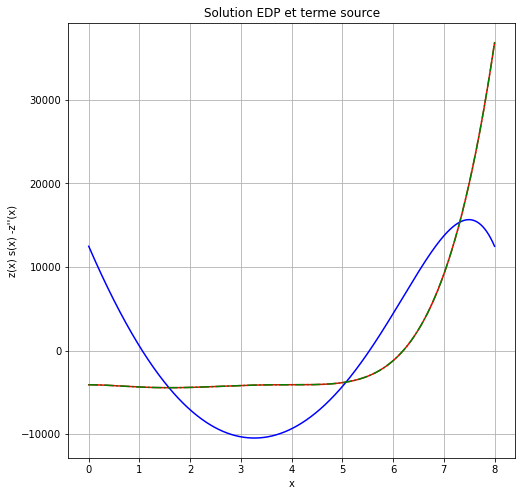

In [43]:
from scipy.fftpack import fft, ifft
import time

L = 8             
N = 2**15            # nombre de points d'échantillonnage
print('N=',N)
dx = L/(N)            
# construction du signal
x = linspace(0.0,L-dx,N)
s=10*x**2*(x-L/2)**3
s-=s@(0*s+1)/N
#puis le calcul de la TFD par l'algorithme de FFT :
start = time.time()
tfd = fft(s)
#plot(x,tfd,'r');

tfd[1:]=tfd[1:]/(2*pi/L*arange(1,N))**2
z=2*ifft(tfd).real#fft(tfd)/N#z=z[-1:-N-1:-1]
print("elapsed_time =", time.time() - start) 
figure(figsize=(8,8))
grid(True)
plot(x,s,'r')
plot(x,z,'b')
plot(x[1:N-1],(2*z[1:N-1]-z[0:-2]-z[2:N])/dx**2,'g-.')
title('Solution EDP et terme source')
xlabel('x')
ylabel("z(x) s(x) -z''(x)");


En prenant pour base des fonctions trigonométriques périodiques réelles, on obtient le même résultat.

N= 16384


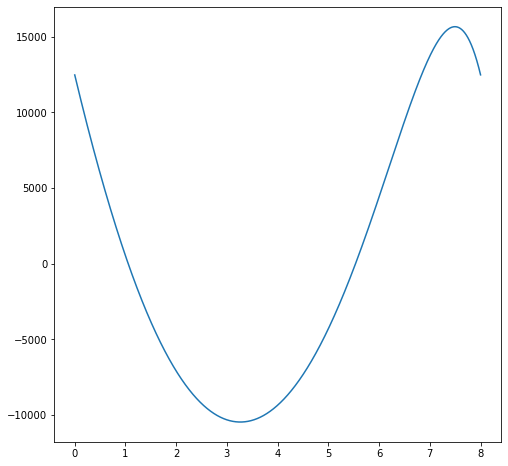

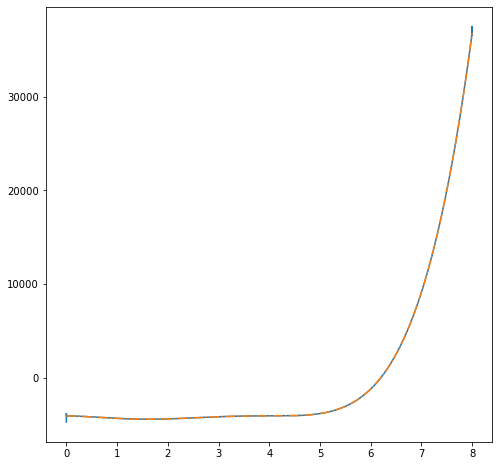

In [44]:
from scipy.fftpack import  rfft, irfft
import time
# paramètres 
L = 8            
N = 2**14
print('N=',N)
dx = L/(N)            
x = linspace(0.0,L-dx,N)
kk=zeros(N)
kk[1::2]=range(1,int(N/2)+1)
kk[0::2]=range(0,int(N/2))
s=10*x**2*(x-L/2)**3
s-=s@(0*s+1)/N
Uf=rfft(s)
Uf[1:]=Uf[1:]/(2*pi*kk[1:]/L)**2
U=irfft(Uf)
figure(figsize=(8,8))
plot(x,U);
figure(figsize=(8,8))
plot(x[1:N-1],(2*U[1:N-1]-U[0:N-2]-U[2:N])/dx**2);
plot(x[1:-1],s[1:-1],'-.');

En travaillant avec la base de fonction trigonométrique respectant des conditions limites de type Neumann homogène, on peut résoudre le problème de Neumann suivant.

simu time 0.005057096481323242
4096 2.648359076484752e-08


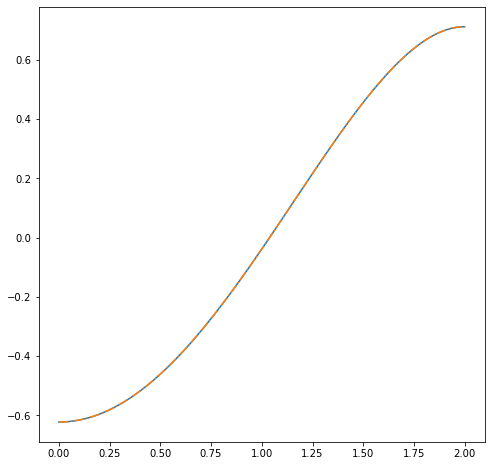

In [45]:
from scipy.fftpack import dct, idct
import time
N=2**12
L=2
dx=L/N
x = linspace(dx/2,L-dx/2,N)
f=x**2#-4/3.#ones(N)#sin(pi*1.5*x/L)
#f[0:int(5*N/6)]=0.
#f=2*ones(N)
#f[0:int(N/2)]=0.
f=f-f@ones(N)/N
#f[0:int(N/10)]=0
#f[-1-int(N/10):-1]=0
start = time.time()
U=dct(f)
U[1:]=U[1:]/(pi*arange(1,N)/L)**2
U=0.5*idct(U)/N
print('simu time',time.time()-start)
figure(figsize=(8,8))
plot(x,U);
uex=-x**4/12+4/3.*x**2/2
uex=uex-uex@ones(N)/N
plot(x,uex,'-.');
print(N,max(abs(uex-U)))


On peut s'assurer que cette approximation est bien d'ordre 2. Voici ci-dessous un script python pour vérifier l'ordre de la méthode pour un problème de Neuman 1D.

l'ordre de la méthode est : 1.9995112156059645


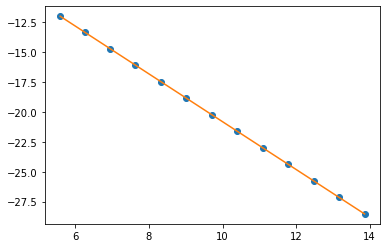

In [46]:
L=2.
def pb_neuman(N):
    dx=L/N
    x = linspace(dx/2,L-dx/2,N)
    f=x**2
    f=f-f@ones(N)/N
    start = time.time()
    U=dct(f)
    U[1:]=U[1:]/(pi*arange(1,N)/L)**2
    U=0.5*idct(U)/N
    simu_time=time.time()-start
    uex=-x**4/12+4/3.*x**2/2
    uex=uex-uex@ones(N)/N
    return [max(abs(uex-U)),simu_time]
    
errtab=[]
Ntab=[]
comp=[]
for l in range(8,21):
    N=2**l+10
    Ntab.append(N)
    errtab.append(pb_neuman(N)[0])
    comp.append(pb_neuman(N)[1])
Ntab=array(Ntab)
errtab=array(errtab)
comp=array(comp)
plot(log(Ntab),log(errtab),'o')
plot(log(Ntab),polyfit(log(Ntab),log(errtab), 1)[0]*log(Ntab)+polyfit(log(Ntab),\
log(errtab), 1)[1])
print("l'ordre de la méthode est :",-polyfit(log(Ntab),log(errtab), 1)[0])

On peut étendre la résolution des EDPs à coefficients constants sur domaine cartésien en dimension supérieure. Pour le problème de Neumann en dimension 2, traité ci-dessous, une comparaison en temps calcul est donnée avec une approche par diférences finies ou volume fini sur grille cartésienne.

In [47]:
def Laplace(N,M,l,h):
    D0=(2/(l**2)+2/(h**2))*ones(N*M)# diagonale principale
    D1=-1/l**2*ones(N*M)# surdiagonale
    D1[N::N]=0.#correction de la surdiagonale (voisin de droite n existe pas au bord droit)
    D0[0::N]-=1/l**2
    D0[N-1::N]-=1/l**2
    DM1=-1/l**2*ones(N*M)# sousdiagonale
    DM1[N-1::N]=0.#correction de la sousdiagonale (voisin de gauche n existe pas au bord gauche)
    DN=-1/h**2*ones(N*M)
    D0[0:N]-=1/h**2
    D0[N*(M-1):]-=1/h**2
    A=spdiags(D0,[0],N*M,N*M)+spdiags(D1,[1],N*M,N*M)+spdiags(DM1,[-1],N*M,N*M)
    A=A+spdiags(DN,[N],N*M,N*M)+spdiags(DN,[-N],N*M,N*M)
    return A.tocsr()
from scipy.fftpack import dctn, idctn
N=1400
M=1600
L=2
H=2
dx=L/N
dy=H/M
LAP=Laplace(N,M,dx,dy)
x = linspace(dx/2,L-dx/2,N)
y = linspace(dy/2,H-dy/2,M)
X, Y = meshgrid(x,y)
f=(X-0.5*L)**2+(Y-0.5*H)**2
#f=(4*pi**2/L**2+9*pi**2/H**2)*cos(2*pi*X/L)*cos(3*pi*Y/H)
f=f-reshape(f,N*M)@ones(N*M)/(N*M)
start=time.time()
U=dctn(f)
Ti,Tj=meshgrid(range(N),range(M))
Ti[0,0]=1.
Tj[0,0]=1.
U=U/(pi**2*Ti**2/L**2+pi**2*Tj**2/H**2)
U=0.25*idctn(U)/(N*M)
#U=U/sqrt(2)
print('grille',N,M,'temps simu fft',time.time()-start)
start=time.time()
U_DF=spsolve(LAP,reshape(f,N*M))
U_DF-=U_DF@ones(N*M)/(N*M)
print('grille',N,M,'temps simu difference finie',time.time()-start)
err=reshape(U,N*M)-U_DF
print(max(abs(err))/max(abs(U_DF)))


grille 1400 1600 temps simu fft 0.14426088333129883
grille 1400 1600 temps simu difference finie 82.88002896308899
2.2480726889205454e-06


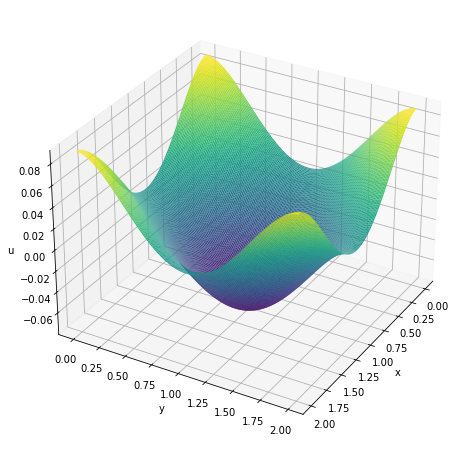

In [48]:
from mpl_toolkits import mplot3d
fig = figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X[::10,::10], Y[::10,::10], U[::10,::10], rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');
ax.view_init(30, 30)


<font size="4">
    
### Résolution par élément fini

On présente la mise en oeuvre des éléments finis $\mathbb P_1$ 1D pour le problème de Robin suivant:
$$
\begin {align}
-u''(x)=f(x), \quad x\in ]0,L[,\\
-u'(0)+ a_0 u(0)=b_0,\\
u'(L)+ a_1 u(L)=b_1.
\end {align}
$$
où $f$ est donné dans $L^2(]0,L[)$ et les constantes $a_0$ et $a_1$ sont bien-sûr positives, dont au moins une stricte afin d'assurer l'ellipticité de l'opérateur sur l'espace $H^1(]0,L[)$. Il convient de vérifier en effet que toutes les hypothèses du théorème de Lax-Milgram sont vérifiées pour la formulation faible:
$$
\left (\mathcal V\right ) \begin {cases}
\text{Trouver } u\in H^1(]0,L[)\text{ tel que }\forall v\in H^1(]0,L[)\\
\int_0^L u'(x)v'(x)\,dx+a_0u(0)v(0)+a_1u(L)v(L)=\int_0^L f(x)v(x)\,dx+b_0v(0)+b_1v(L).
\end {cases}
$$
On notera $a(u,v)$ l'expression de la forme bilinéaire intervenant dans le membre de gauche de $\left (\mathcal V\right )$ et on notera $l(v)$ la forme linéaire intervenant dans le membre de droite de $\left (\mathcal V\right )$.
##### Formulation faible approchée
On cherche à résoudre le problème approché en dimension finie,
$$
\left (\mathcal V_h\right ) \begin {cases}
\text{Trouver } u_h\in V_h\text{ tel que }\forall v\in V_h\\
\int_0^L u_h'(x)v'(x)\,dx+a_0u_h(0)v(0)+a_1u_h(L)v(L)=\int_0^L f(x)v(x)\,dx+b_0v(0)+b_1v(L),
\end {cases}
$$
où $V_h\subset H^1(]0,L[)$ est de dimension finie et 
$$
V_h=\{ v\in \mathcal C^0(]0,L[)\text{ tel que }v_{|[x_i,x_{i+1}]  }   \in \mathbb P_1,~\forall 0\le i< N-1\},
$$
avec $x_i=ih$ où $h$ est le pas de la subdivision uniforme de $[0,L]$, soit $h=\frac L {N-1}$.
#### Base de l'espace d'approximation
On construit une base de $V_h$ à l'aide des fonctions chapeaux suivantes $\Phi_i$ pour $0\le i<N$,
$$
\begin {cases}
\Phi_i(x)=\frac {x-x_{i-1}} h \text { si }x_{i-1}\le x\le x_{i},\\
\Phi_i(x)=\frac {-x+x_{i+1}} h \text { si }x_{i}\le x\le x_{i+1},\\
\Phi_i(x)=0\text { sinon }.
\end {cases}
$$
On vérifie aisément que $\{\Phi_i \}_{0\le i< N}$ forme une famille libre et génératrice de $V_h$:
$$
\forall v\in V_h,\quad v=\sum_{i=0}^{N-1}v(x_i)\Phi_i.
$$
##### Système linéaire associé à $\left (\mathcal V_h\right )$
On cherche $u_h$ qui se décompose sur la base $\{\Phi_i \}_{0\le i< N}$ de dimension $N$,
$$
u_h(x)=\sum_{i=0}^{N-1}u_i\Phi_i(x),\quad \forall x\in [0,L].
$$
On notera que les inconnues $u_i$ (coefficients scalaires dans la base) satisfont $u_i=u_h(x_i)$, ce qui sera bien pratique pour visualiser la solution sans avoir à reconstruire $u_h$.

Plutôt que de vérifier $\left (\mathcal V_h\right )$ pour tout $v\in V_h$, il suffit de vérifier la formulation variationelle pour tout $\Phi_i$, $0\le i<N$. On a ainsi $N$ équations scalaires pour $N$ inconnues. Soit le système matricielle,
$$
AU=F,\text{ avec }U=(u_0,\cdot,u_{N-1})^t, ~F=(l(\Phi_0),\cdot,l(\Phi_{N-1}))^t, \text{ et }A_{ij}=a(\Phi_j,\Phi_i).
$$
##### Assemblage de la matrice
Dans le cas présent, il est facile d'identifier chacun des coefficients du système en remarquant que la matrice est tridiagonale compte tenu du support des fonctions de base qui s'interesctent seulement avec la fonction de base précédente et suivante. 
Il suffit alors de calculer $a(\Phi_i,\Phi_i)$, $a(\Phi_i,\Phi_{i-1})$ et $a(\Phi_i,\Phi_{i+1})$ en traitant à part $i=0$ et $i=N-1$.

Néanmoins, dans un soucis de généralisation, nous allons présenter une méthode qui s'appliquera tout aussi simplement en dimension supérieure. Cette méthode consiste à construire une matrice dite élémentaire qui évalue le calcul intégral de la formulation faible sur un élément fini et l'assemblage de la matrice globale $A$ se faisant alors par somme des contributions venant de chaque élément.

On construit la matrice élémentaire
$$
el=\left (\begin {matrix}
\int_0^h \varphi_1'(x)\varphi_1'(x)\, dx &\int_0^h\varphi_1'(x)\varphi_2'(x)\, dx\\
\int_0^h \varphi_2'(x)\varphi_1'(x)\, dx &\int_0^h\varphi_2'(x)\varphi_2'(x)\, dx,\\
\end {matrix}\right )
$$
où, quitte à translater l'intervalle de $x_k$, $\varphi_1$ est la restriction de $\Phi_{k}$ à $[x_k,x_{k+1}]$ et $\varphi_2$ est la restriction de $\Phi_{k+1}$ à $[x_k,x_{k+1}]$. Sur $[0,h]$, on a 
$$
 \varphi_1(x)=\frac {h-x}{h}, \quad \varphi_2(x)=\frac {x}{h}.
$$
Ainsi,
$$
el=\frac 1 {h}\left (\begin {matrix}
1 &-1\\
-1&1\\
\end {matrix}\right ).
$$
La clé du remplissage de la matrice globale $A$ repose sur la formule
$$
\int_0^L \Phi_i'(x)\Phi_j'(x)\,dx=\sum_{k=0}^{N-2}\int_{x_k}^{x_{k+1}} \Phi_i'(x)\Phi_j'(x)\,dx,
$$
mais aussi sur le fait que sur l'intervalle $[x_k,x_{k+1}]$ la contribution des termes $\Phi_i$ et $\Phi_j$ est non triviale lorsque ceux-ci sont les fonctions de base attachées au sommet $x_k$ et $x_{k+1}$. A une translation près, ce sont les fonctions $\varphi_1$ et $\varphi_2$.

#### Construction du second membre
La construction du second membre nécessite le calcul de 
$$
\int_0^L f(x)\Phi_k(x)\,dx+b_0\Phi_k(0)+b_1\Phi_k(L).
$$
Les termes provenant des conditions limites inhomogènes de Robin sont triviaux à calculer et n'apparaissent que si $k=0$ ou si $k=N-1$.
Le terme intégral est plus compliqué. On se contentera d'une formule de quadrature pour l'approcher. Une formule des trapèzes basée sur la subdivision $(x_i)_{i=0}^{n-1}$ donne,
$$
\int_0^L f(x)\Phi_k(x)\,dx\sim h\left (\frac {f(x_0)\Phi_k(x_0)} 2+\sum_{l=1}^{N-1}f(x_l)\Phi_k(x_l)+\frac {f(x_{N-1})\Phi_k(x_{N-1})} 2\right ).
$$
Mais comme $\Phi_k(x_l)=\delta_{kl}$,
$$
\begin {cases}
F_0=h\frac {f(x_0)} 2 +b_0,\\
F_k=hf(x_k),~0<k<N-1,\\
F_{N-1}=h\frac {f(x_{N-1})} 2 +b_1.
\end {cases}
$$
</font>

In [49]:
from scipy.sparse import  spdiags
from scipy.sparse.linalg import spsolve
from scipy.sparse import lil_matrix, csr_matrix, spdiags
N=71
L=7
h=L/(N-1)
#remplissage de la matrice
#le format  LIL (list de list) permet de remplir 
#les coefficients d'une matrice creuse en accedant à sa position 
#ligne colonne
#A est ici initialisée à la matrice nulle de la taille considérée
A =lil_matrix((N, N))
#construction de la matrice élémentaire du terme integral
el=array([[1,-1],[-1,1]])/h
#Parcours des éléments
for k in range(N-1):
    S=array([k,k+1])# ce tableau contient les numéros des 2 sommets
    for i in range(2):
        for j in range(2):
            A[S[i],S[j]]=A[S[i],S[j]]+el[i,j]
# la matrice A ici construite ne contient que la contribution 
#intégrale, soit celle qu'on aurait eu avec de CL de Neuman homogène
#
#On va rajouter les termes provenant des CL de Robin
a0=30
a1=20
A[0,0]=A[0,0]+a0
A[N-1,N-1]=A[N-1,N-1]+a1

A.toarray()
# on remarque, miracle, que la matrice obtenue par EF P1 est la même 
# que celle obtenue par différence fini à un facteur h près

array([[ 40., -10.,   0., ...,   0.,   0.,   0.],
       [-10.,  20., -10., ...,   0.,   0.,   0.],
       [  0., -10.,  20., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,  20., -10.,   0.],
       [  0.,   0.,   0., ..., -10.,  20., -10.],
       [  0.,   0.,   0., ...,   0., -10.,  30.]])

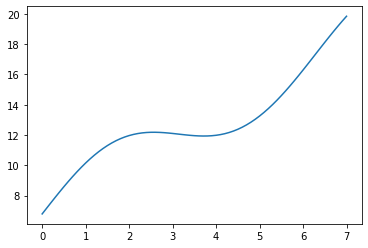

In [50]:
#construction du second membre
b0=200
b1=400
x=linspace(0,L,N)
fx=2*sin(x)#on a choisi f(x)=2sin(x) 
F=h*fx
F[0]=F[0]*0.5+b0
F[N-1]=F[N-1]*0.5+b1
#conversion en csr (compressed storage row) pour resolution system
A=A.tocsr()
#resolution systeme creux
U=spsolve(A,F)
plot(x,U);

On étend la méthode élément fini à un problème 2D maillé par des triangles. La construction de la matrice est proposée ci-après pour un maillage conforme admissible.

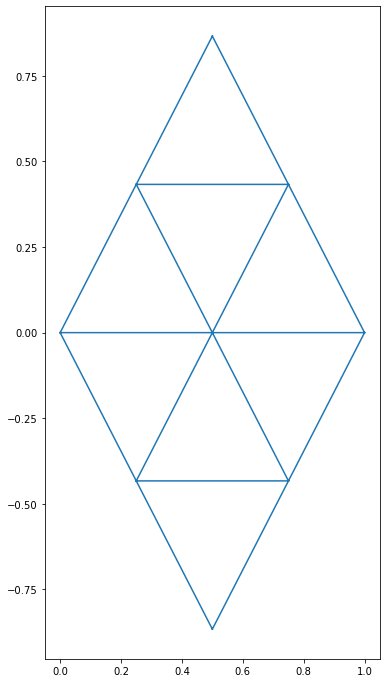

In [110]:
import matplotlib.tri as mptri
points = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2],  [0.5, -np.sqrt(3)/2]])
triang=mptri.Triangulation(points[:,0], points[:,1])
#maskt=[True for i in range(len(triang.triangles))]
#maskt[0]=False
#maskt[1]=False
triang=mptri.Triangulation(points[:,0], points[:,1], mask=maskt)
refiner = mptri.UniformTriRefiner(triang)
tri3 = refiner.refine_triangulation(subdiv=1)
plt.subplots(figsize=(6, 12))
plt.triplot(tri3.x, tri3.y, tri3.triangles);

In [52]:
print(tri3.x)
print(tri3.y)
print(tri3.triangles)

[0.   1.   0.5  0.5  0.75 0.75 0.5  0.25 0.25]
[ 0.         0.         0.8660254 -0.8660254 -0.4330127  0.4330127
  0.         0.4330127 -0.4330127]
[[0 6 7]
 [1 5 6]
 [2 7 5]
 [6 5 7]
 [3 4 8]
 [1 6 4]
 [0 8 6]
 [4 6 8]]


[0.    1.    0.5   0.5   0.75  0.75  0.5   0.25  0.25  0.875 0.375 0.625
 0.625 0.75  0.125 0.625 0.5   0.375 0.125 0.625 0.375 0.375 0.875 0.25
 0.5  ]
[ 0.          0.          0.8660254  -0.8660254  -0.4330127   0.4330127
  0.          0.4330127  -0.4330127   0.21650635  0.64951905  0.21650635
 -0.64951905  0.         -0.21650635 -0.21650635  0.4330127  -0.21650635
  0.21650635  0.64951905  0.21650635 -0.64951905 -0.21650635  0.
 -0.4330127 ]
[[ 0 23 18]
 [ 6 20 23]
 [ 7 18 20]
 [23 20 18]
 [ 1  9 13]
 [ 5 11  9]
 [ 6 13 11]
 [ 9 11 13]
 [ 2 10 19]
 [ 7 16 10]
 [ 5 19 16]
 [10 16 19]
 [ 6 11 20]
 [ 5 16 11]
 [ 7 20 16]
 [11 16 20]
 [ 3 12 21]
 [ 4 24 12]
 [ 8 21 24]
 [12 24 21]
 [ 1 13 22]
 [ 6 15 13]
 [ 4 22 15]
 [13 15 22]
 [ 0 14 23]
 [ 8 17 14]
 [ 6 23 17]
 [14 17 23]
 [ 4 15 24]
 [ 6 17 15]
 [ 8 24 17]
 [15 17 24]]


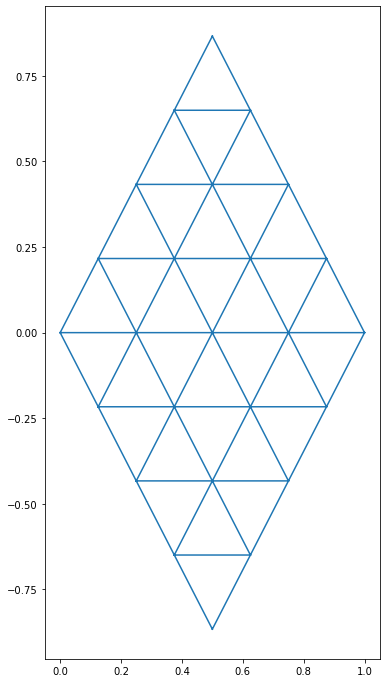

In [19]:
tri3 = refiner.refine_triangulation(subdiv=2)
plt.subplots(figsize=(6, 12))
plt.triplot(tri3.x, tri3.y, tri3.triangles);
print(tri3.x)
print(tri3.y)
print(tri3.triangles)

In [66]:
from scipy.sparse.linalg import spsolve
from scipy.sparse import lil_matrix, csr_matrix

tri3 = refiner.refine_triangulation(subdiv=8)

def matrice_rig(pt):
    surface=np.linalg.norm(np.cross(pt[2]-pt[0], pt[1]-pt[0]))*0.5
    #print(surface)
    B=np.array([[pt[2,1]-pt[0,1],pt[0,1]-pt[1,1]],[pt[0,0]-pt[2,0],pt[1,0]-pt[0,0]]])
    BtB=B.T@B
    nabphi=np.array([[-1,-1],[1,0],[0,1]])
    return nabphi@BtB@nabphi.T*0.25/surface

#nbre de triangles
nt=np.size(tri3.triangles,0)
#nbre ddl (sommets)
nddl=np.size(tri3.x,0)
print(nddl)
A =lil_matrix((nddl, nddl))
for tr in range(nt):
    S=tri3.triangles[tr]
    pt=np.zeros((3,2))
    pt[:,0]=tri3.x[S]
    pt[:,1]=tri3.y[S]
    el=matrice_rig(pt)
    for i in range(3):
        for j in range(3):
            A[S[j],S[i]]+=el[i,j]
A=A.tocsr()
#A.toarray()

66049


[-5.46323695e-06 -1.07561034e-06 -3.26943485e-06 ... -9.89063152e-07
 -1.14392056e-06 -1.04108556e-06]
-3.903127820947816e-17


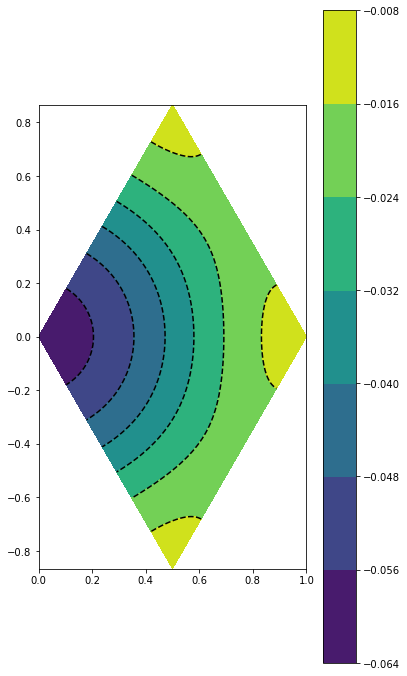

In [69]:
#calcul du second membre
def f(coord):
    x=coord[0]
    y=coord[1]
    return x**2+y**2
#parcours des elements
SM=zeros(nddl)
for tr in range(nt):
    S=tri3.triangles[tr]
    pt=np.zeros((3,2))
    pt[:,0]=tri3.x[S]
    pt[:,1]=tri3.y[S]
    surface=np.linalg.norm(np.cross(pt[2]-pt[0], pt[1]-pt[0]))*0.5
    for i in range(3):
            G=pt[0,:]+pt[1,:]+pt[2,:]
            G/=3
            SM[S[i]]+=f(G)*surface/3
            
SM-=SM@ones(nddl)/nddl
print(SM)
print(SM@ones(nddl))
u=spsolve(A,SM)
fig1, ax1 = plt.subplots(figsize=(6, 12))
ax1.set_aspect('equal')
tcf = ax1.tricontourf(tri3, u)
fig1.colorbar(tcf)
ax1.tricontour(tri3, u, colors='k')

#### Exercice Volume fini

Pour une variante VF4 des EF. Mettre en oeuvre de l'assemblage de la matrie du problème de Neuman en VF4 (inconnues à l'orthocentre de chaque triangle du maillage) 

- Reprendre le maillage précédent: construire la liste des arêtes et la liste renvoyant les numéros des 2 triangles adjacents à l'arête considérée en même position dans la liste des arêtes. Le numéro -1 sera renvoyé lorsque le deuxième triangle n'existe pas (arête du bord)
- Assembler la matrice à l'aide du schéma VF4. 

In [90]:
refiner = mptri.UniformTriRefiner(triang)
tri3 = refiner.refine_triangulation(subdiv=6)
nt=np.size(tri3.triangles,0)
LA=[]
LC=[]
for tr in range(nt):
    S=tri3.triangles[tr]
    for i in range(3):
        arete=[min(S[i],S[(i+1)%3]),max(S[i],S[(i+1)%3])]
        if (arete in LA):
            LC[LA.index(arete)][1]=tr
        else:
            LA.append(arete)
            LC.append([tr,-1])
print(len(LA))
#print(LC)
print(LA[12])
print(tri3.x[1])

12416
[754, 1090]
1.0


In [91]:
#Methode VF 4 pour l'assemblage du problème de Neumann
from scipy.sparse.linalg import spsolve
from scipy.sparse import lil_matrix, csr_matrix

def longueur(arete):
    x1=tri3.x[arete[0]]
    y1=tri3.y[arete[0]]
    x2=tri3.x[arete[1]]
    y2=tri3.y[arete[1]]
    return sqrt((x1-x2)**2+(y1-y2)**2)
def coordonnee(C):
    S=tri3.triangles[C]
    #on triche ici car l'intersction des mediatrices est aussi l'isobarycentre
    pt[:,0]=tri3.x[S]
    pt[:,1]=tri3.y[S]
    G=pt[0,:]+pt[1,:]+pt[2,:]
    G/=3
    return G
    
def distance(CC):
    [x1,y1]=coordonnee(CC[0])
    [x2,y2]=coordonnee(CC[1])
    return sqrt((x1-x2)**2+(y1-y2)**2)

nt=np.size(tri3.triangles,0)
M=lil_matrix((nt,nt))
#parcours des aretes:
for na in range(len(LA)):
    C1=LC[na][0]
    C2=LC[na][1]
    if C2!=-1:
        long=longueur(LA[na])
        distC1C2=distance(LC[na])
        M[C1,C1]+=long/distC1C2
        M[C1,C2]-=long/distC1C2
        M[C2,C2]+=long/distC1C2
        M[C2,C1]-=long/distC1C2
    
print(M)    
M=M.tocsr()
    

  (0, 0)	3.4641016151377544
  (0, 3)	-1.7320508075688772
  (0, 6144)	-1.7320508075688774
  (1, 1)	5.196152422706632
  (1, 3)	-1.7320508075688772
  (1, 12)	-1.7320508075688772
  (1, 6146)	-1.7320508075688774
  (2, 2)	3.4641016151377544
  (2, 3)	-1.7320508075688774
  (2, 14)	-1.7320508075688772
  (3, 0)	-1.7320508075688772
  (3, 1)	-1.7320508075688772
  (3, 2)	-1.7320508075688774
  (3, 3)	5.196152422706632
  (4, 4)	5.196152422706632
  (4, 7)	-1.7320508075688772
  (4, 48)	-1.7320508075688772
  (4, 6152)	-1.7320508075688774
  (5, 5)	5.196152422706632
  (5, 7)	-1.7320508075688774
  (5, 13)	-1.7320508075688772
  (5, 50)	-1.7320508075688772
  (6, 6)	5.196152422706632
  (6, 7)	-1.7320508075688772
  (6, 12)	-1.7320508075688772
  (6, 6153)	-1.7320508075688774
  (7, 4)	-1.7320508075688772
  (7, 5)	-1.7320508075688774
  (7, 6)	-1.7320508075688772
  (7, 7)	5.196152422706632
  (8, 8)	3.4641016151377544
  (8, 11)	-1.7320508075688774
  (8, 56)	-1.7320508075688767
  (9, 9)	3.464101615137755
  (9, 11)	-

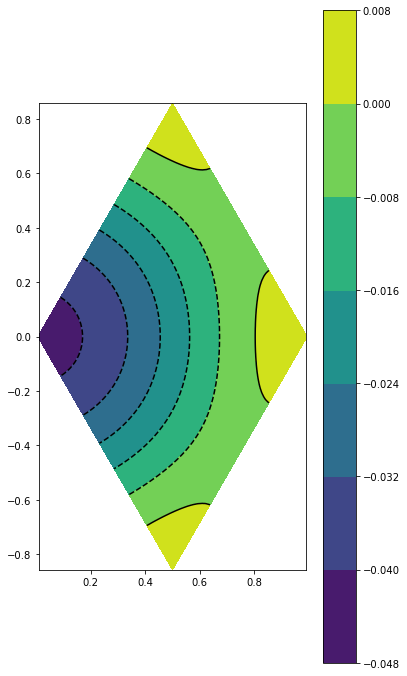

In [92]:
# construction du second membre pour VF4
def f(coord):
    x=coord[0]
    y=coord[1]
    return x**2+y**2
#parcours des elements
SM=zeros(nt)
LG=[]
for tr in range(nt):
    S=tri3.triangles[tr]
    pt=np.zeros((3,2))
    pt[:,0]=tri3.x[S]
    pt[:,1]=tri3.y[S]
    surface=np.linalg.norm(np.cross(pt[2]-pt[0], pt[1]-pt[0]))*0.5
    G=pt[0,:]+pt[1,:]+pt[2,:]
    G/=3
    SM[tr]=f(G)*surface
    LG.append(G)
            
SM-=SM@ones(nt)/nt
#print(SM)
#print(SM@ones(nt))

# resolution du system VF4: inconnues sur les triangles (ici au barycentre= inersection mediatrice)
u=spsolve(M,SM)



#visualisation 
points = np.array(LG)
tridual=mptri.Triangulation(points[:,0], points[:,1])
fig1, ax1 = plt.subplots(figsize=(6, 12))
ax1.set_aspect('equal')
tcf = ax1.tricontourf(tridual, u)
fig1.colorbar(tcf)
ax1.tricontour(tridual, u, colors='k')

<font size="4">
    
### Pénalisation de domaine 
#### Pénalisation de Dirichlet
Soit $\Omega_0\subset \Omega$. On souhaite poser une condition limite de Dirichlet sur $\partial \Omega_0$ pour résoudre une EDP elliptique sur $\Omega\backslash \Omega_0$. Surtout lorsque le domaine $\Omega$ est cartésien, ce qui permet de proposer un maillage de type grille cartésienne, on peut opter pour une méthode de pénalisation du domaine $\Omega_0$.

Soit le problème :
$$
\begin {cases}
&\nabla \cdot(a(x)\nabla u(x))=f(x), \quad x\in \Omega\backslash \Omega_0,\\
& u = b \text{ sur } \partial\Omega_0,\\
&\partial_n u =0 \text{ sur } \partial \Omega ,
\end {cases}
$$
où le coefficient de diffusion $a(x)$ est supposé non dégénéré ($a\ge a_0>0$) borné et la fonction $b$ est supposée définie sur $\Omega_0$ (par prolongement continue) et continue.
La solution de cette EDP (exercice) est la solution du problème de minimisation :
Trouver $u\in E=\{ v\in H^1(\Omega\backslash \Omega_0),~ v_{|\partial \Omega_0}=b\}$ qui réalise le minimum :
$$
\min_{v\in E}  \int_{\Omega \backslash \Omega_0} \frac 1 2 a(x)|\nabla v(x)|^2-f(x)\,v(x)\, dx.
$$
On approche ce problème par pénalisation de domaine : Trouver $u\in H^1(\Omega)$ qui satisfait le minimum :
$$
\min_{v\in H^1(\Omega)}\frac 1 2 \int_{\Omega } a(x)|\nabla v(x)|^2-f(x)\,v(x)\, dx+\frac 1 {2\varepsilon}\int_{\Omega_0 } (v(x)-b(x))^2\, dx,
$$
avec $\varepsilon>0$ destiné à être petit.
    
**Remarque** :On peut choisir de prolonger $a$ sur $\Omega_0$ par n'importe quel prolongement strictement positif, de même pour $f$ qui peut être prolongé, même par $0$, ou tout autre choix plus simple à mettre en oeuvre.

**Remarque** : La convergence vers le problème souhaité lorsque $\varepsilon\to 0$ s'obtient comme étudié pour le problème de Stokes.

On peut aussi approcher le problème par pénalisation de frontière : Trouver $u\in H^1(\Omega\backslash \Omega_0)$ qui satisfait le minimum :
$$
\min_{v\in H^1(\Omega\backslash \Omega_0)}\int_{\Omega \backslash \Omega_0} \frac 1 2 a(x)|\nabla v(x)|^2-f(x)\,v(x)\, dx+\frac 1 {2\varepsilon}\int_{\partial\Omega_0 } (v(x)-b(x))^2\, d\gamma,
$$
avec $\varepsilon>0$ destiné à être petit. On retrouve alors (exercice) comme EDP un problème de Robin inhomogène (CL sur $\partial\Omega_0$ :$\partial_n u +\frac 1 \varepsilon (u-b)=0$).
#### Pénalisation de condition limite de Neuman
Pour simplifier l'écriture, on cherche à approcher des conditions de Neumann homogène :
$$
\begin {cases}
&\nabla \cdot(a(x)\nabla u(x))=f(x), \quad x\in \Omega\backslash \Omega_0,\\
& \partial_n u = 0 \text{ sur } \partial\Omega_0,\\
&\partial_n u =0 \text{ sur } \partial \Omega ,
\end {cases}
$$
où le coefficient de diffusion $a(x)$ est supposé non dégénéré ($a\ge a_0>0$) borné.
La solution de cette EDP (exercice) est la solution du problème de minimisation :
Trouver $u\in H^1(\Omega\backslash \Omega_0)$ qui réalise le minimum :
$$
\min_{v\in H^1(\Omega\backslash \Omega_0)}\int_{\Omega \backslash \Omega_0} \frac 1 2 a(x)|\nabla v(x)|^2-f(x)\,v(x)\, dx.
$$
On approche ce problème par pénalisation (ou "dégénerescence"!) de domaine : Trouver $u\in H^1(\Omega)$ qui satisfait le minimum :
$$
\min_{v\in H^1(\Omega)}\int_{\Omega } \frac 1 2  a(x)|\nabla v(x)|^2-f(x)\,v(x)\, dx,
$$
avec $\varepsilon>0$ destiné à être petit et **avec la diffusion $a$ prolongée par $0$ sur $\Omega_0$**.

C'est la continuité des flux qui garantit le flux nul sur $\partial \Omega_0$. (exercice).

</font>

<font size="4">

# Problème parabolique    
## Equation de la chaleur
On va étudier la manière d'approcher l'équation de la chaleur. Celle-ci décrit les phénomènes transitoires (instationnaires) en temps d'un phénomène de diffusion.

On introduit d'abord un problème elliptique qui décrit le phénomène de diffusion stationnaire. On reprend le problème de Dirichlet étudié précédemment:
$$
\begin{align}
&-u_l''(x)=f(x),\quad \forall x\in ]0,L[,\\
&u_l(0)=u_l(L)=0.
\end {align}
$$
Le modèle parabolique décrit par l'équation de la chaleur s'écrit,
$$
\begin{align}
&\partial_t u(t,x)-\partial_{xx}u(t,x)=f(t,x),\quad \forall x\in ]0,L[,\\
&u(0,x)=u_0(x),~\forall x\in ]0,L[,\\
&u(t,0)=u(t,L)=0,~\forall t>0.
\end {align}
$$
### Rappel de propriétés 
On rappelle (cours) que, sous réserve de régularité de $f$, la solution satisfait l'estimation suivante, il existe $a>0$ tel que
$$
\|u(t,.)\|^2_{L^2((0,L))}\le \|u_0\|^2_{L^2((0,L))}e^{-a t}
+\int_0^t e^{-a (t-s)}\|f(s,x)\|^2_{L^2((0,L))}.
$$
On observe le caractère amorti de l'équation grâce à l'ellipticité de l'opérateur de Dirichlet. Si de plus $f$ ne dépend pas de $t$, on note $v(t,x)=u(t,x)-u_l(x)$ et $v$ satisfait,
$$
\begin{align}
&\partial_t v(t,x)-\partial_{xx}v(t,x)=0,\quad \forall x\in ]0,L[,\\
&v(t,0)=v(t,L)=0,~\forall t>0.
\end {align}
$$
On en déduit alors que
$$
\|v(t,.)\|^2_{L^2((0,L))}\le \|v(0,.)\|^2_{L^2((0,L))}e^{-a t}.
$$
On observe l'amortissement de $v$ vers $0$ soit l'amortissement de $u$ vers $u_l$. La solution du problème stationnaire est l'asymptotique du problème instationnaire, quelle que soit la donnée initiale.

### Schémas en temps Euler implicite
On propose le schéma d'Euler implicite, de pas $\delta t$, pour l'équation en $v$:
$$
\begin{align}
&\frac {v^{n+1}(x)-v^{n}(x)}{\delta t}-\partial_{xx}v^{n+1}(x)=0,\quad \forall x\in ]0,L[,\\
&v^{n+1}(0)=v^{n+1}(L)=0,\\
&v^0=v_0.
\end {align}
$$
On remarque qu'il s'agit d'une suite de problèmes elliptiques, ainsi la suite est bien définie dans $H^1_0((0,L))$ à partir du rang $1$ dès lors que $v_0\in H^{-1}((0,L))$.
En prenant le produit scalaire $L^2((0,L))$ de cette équation avec $v^{n+1}$ et en utilisant l'inégalité de Poincaré, on a,
$$
(1+a\delta t)\|v^{n+1}\|_{L^2((0,L))}^2\le \|v^{n+1}\|_{L^2((0,L))}^2+2\delta t\|\partial_x v^{n+1}\|_{L^2((0,L))}^2\le \|v^{n}\|_{L^2((0,L))}^2.
$$
On en déduit la convergence vers $0$, sous-géométrique, de $(v^n)_n$ dans $L^2((0,L))$.

Ceci établit la stabilité asymptotique $L^2((0,L))$ du schéma, **inconditonnellement sur le pas de temps**.
### Schémas en temps Euler explicite
On propose le schéma d'Euler explicite, de pas $\delta t$, pour l'équation en $v$:
$$
\begin{align}
&\frac {v^{n+1}(x)-v^{n}(x)}{\delta t}-\partial_{xx}v^{n}(x)=0,\quad \forall x\in ]0,L[,\\
&v^{n+1}(0)=v^{n+1}(L)=0,\\
&v^0=v_0.
\end {align}
$$
La suite perd $2$ crans de régularité Sobolev à chaque itération. Pour donner de bonnes propriétés à ce schéma, il sera nécessaire de le définir pour une discrétisation spatiale et de respecter une condition CFL qui limite le pas de temps en fonction du pas d'espace.

On introduit la discrétisation uniforme du segment $]0,L[$ par 
$$
x_i=i h, \quad i=0\cdots N+1,
$$
avec $h=\frac L {N+1}$.
On rappelle l'expression de la matrice de discrétisation par différence finie centrée,
$$
A=\frac 1 {h^2} \left (\begin{matrix}&2&-1&0&\cdots&0\\
                                &-1&2&-1&0&\cdots\\
                                &0&-1&2&-1&0 \\
                                &-&-&-&-&-\\
                                &0&\cdots&0&-1&2
                                \end{matrix}
                \right ).
$$
Le schéma discrétisé en temps et en espace s'écrit, avec $V^n\in \mathbb R^N$,
$$
\begin{align}
&\frac {V^{n+1}-V^{n}}{\delta t}+A V^{n}=0,\\
&V^0=(v_0(x_1),\cdots,v_0(x_N))^t.
\end {align}
$$
On sait, cf cours, que ce schéma est asymptotiquement stable pour la norme $L^2$ et la norme $L^\infty$ sous la CFL $\delta t\le \frac {h^2}2$. Sous cette CFL, le schéma est mieux que $L^\infty$-stable, il respecte même le principe du maximum, en effet, en chaque noeud de discrétisation, la solution à l'itéré $n+1$ est combinaison convexe de la solution à l'itéré $n$:
$$
V_i^{n+1}=(1-2\frac {\delta t}{h^2})V_i^{n}+\frac {\delta t}{h^2}V_{i-1}^{n}+\frac {\delta t}{h^2}V_{i+1}^{n}.
$$
## Mise en oeuvre du schéma d'Euler implicite
Quel que soit le choix de l'approximation spatiale, du moment que les matrices qui approchent l'opérateur de Dirichlet et l'opérateur Identité sont définies positives, les schéma obtenu sera inconditionnellement stable pour la norme $L^2$.

On choisit de reprendre les différences finies centrées comme discrétisation spatiale.  
</font>

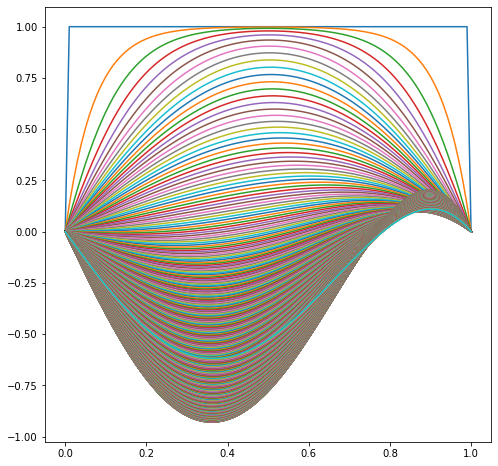

In [30]:
# le pas h
N=100
h=1/(N+1)
dt=0.005
# construction du vecteur de discrétisation
x=linspace(h,1-h,N)
x_avec_CL=linspace(0,1,N+2)
#construction de la fonction f de votre choix
f=lambda x : 150*x**2-100*x
#construction du second membre du systeme
F=f(x)
#construction de la matrice en systeme creux
D0=(1/dt+2/h**2)*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
A=A.tocsr()
#donnee initiale
U=ones(N)
#boucle en temps
figure(figsize=(8,8))
for n in range(int(2.5/dt)):
    U_avec_CL=zeros(N+2)
    U_avec_CL[1:N+1]=U
    plot(x_avec_CL,U_avec_CL);
    t=n*dt# utile si le critère d'arrêt porte sur le temps ou si le 
    #terme source dépend de t
    SM=F*sin(t)+U/dt
    #resolution du systeme creux
    U=spsolve(A,SM)
    
    #On rajoute les points de discrétisation sur l'axe des abscisses.
   # scatter(x,0*x,[0.1],'red')

<font size="4">

### Mise en oeuvre du schéma d'Euler explicite
On choisit de reprendre les différences finies centrées comme discrétisation spatiale. On doit vérifier la stabilité sous la CFL
$$
\delta t\le \frac {h^2} 2.
$$
Dans le code qui suit, modifier le coefficient CFL pour observer la stabilité ou l'instabilité. Dans le cas de l'instabilité, réduire le temps final afin d'observer la naissance de l'instabilité.
</font>

In [31]:
def chaleur_explicite(N,CFL,T):
    h=1/(N+1)
    dt=CFL*0.5*h**2
    # construction du vecteur de discrétisation
    x=linspace(h,1-h,N)
    x_avec_CL=linspace(0,1,N+2)
    #construction de la fonction f de votre choix
    f=lambda x : 150*x**2-100*x
    #construction du second membre du systeme
    F=f(x)
    #construction de la matrice en systeme creux
    D0=(2/h**2)*ones(N)
    D1=-1/h**2*ones(N)
    A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
    #donnee initiale
    U=ones(N)
    #boucle en temps
    print('nombre d iterations',int(T/dt))
    figure(figsize=(8,8))
    for n in range(int(T/dt)):
        t=n*dt# utile si le critère d'arrêt porte sur le temps ou si le 
        #terme source dépend de t
        #iteration explicite du schéma
        U=U+dt*(F-A@U)
        if (n%100==0):
            #Ajout des CL de Dirichlet
            U_avec_CL=zeros(N+2)
            U_avec_CL[1:N+1]=U
            plot(x_avec_CL,U_avec_CL)
            #On rajoute les points de discrétisation sur l'axe des abscisses.
            scatter(x,0*x,[0.1],'red')
    return None

nombre d iterations 4084


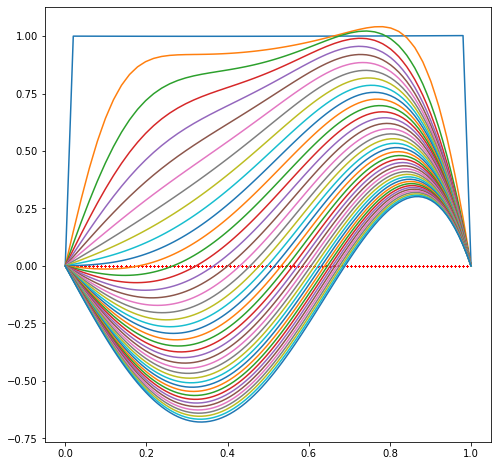

In [32]:
N=100
h=1/(N+1)
CFL=0.999
chaleur_explicite(N,CFL,0.2)

nombre d iterations 2020


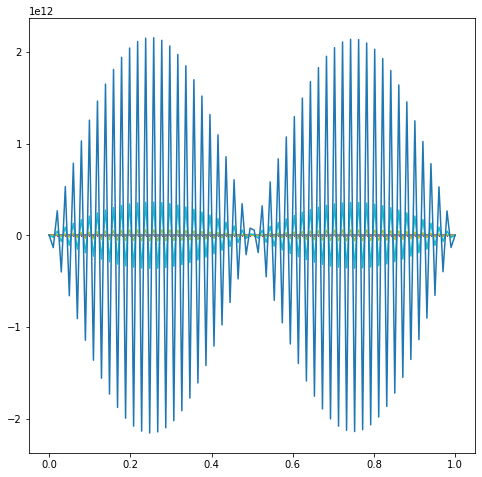

In [33]:
N=100
h=1/(N+1)
CFL=1.01
chaleur_explicite(N,CFL,0.1)

<font size="4">

### Estimation d'erreur
Mettre en oeuvre une validation de l'erreur en temps et en espace. Les schémas proposés étant d'ordre 1 en temps et 2 en espace.

On va construire une solution non trivial et mesurer l'écart entre la solution exacte et approchée pour la norme discrète associée à la norme de l'espace continue $L^\infty(0,T;L^\infty(0,L))$.

On choisit la fonction $u(t,x)=\cos(t)\sin(x(x-L))$ qui satisfait les conditions limites de Dirichlet.
On choisit donc $u_0(x)=\sin(x(x-L))$ et on va calculer l'expression de $f$ afin que l'équation soit satisfaite.</font>

In [115]:
import sympy as sy
t,x,L=sy.symbols('t x L')
u=sy.cos(t)*sy.sin(x*(x-L))
d_t_u=sy.diff(u,t)
d_x_u=sy.diff(u,x)
d_xx_u=sy.diff(d_x_u,x)
f=d_t_u-d_xx_u
print(f)


(-L + 2*x)**2*sin(x*(-L + x))*cos(t) - sin(t)*sin(x*(-L + x)) - 2*cos(t)*cos(x*(-L + x))


In [94]:
fex = lambda t,x,L : (-L + 2*x)**2*sin(x*(-L + x))*cos(t) - sin(t)*sin(x*(-L + x)) - 2*cos(t)*cos(x*(-L + x))
uex = lambda t,x,L : cos(t)*sin(x*(x-L))
def erreur_linfini(L,f,u,T,dt,N,ei):
    h=L/(N+1)
    x=linspace(h,L-h,N)
    #construction de la matrice en systeme creux
    D0=(2/h**2)*ones(N)
    D1=-1/h**2*ones(N)
    A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
    M=spdiags(ones(N),[0],N,N)/dt+A
    #donnee initiale
    U=u(0,x,L)# donnee intiale
    #boucle en temps
    print('nombre d iterations',int(T/dt))
    err=0
    for n in range(int(T/dt)):
        t=(n+0.5)*dt
        F=f(t,x,L)
        #iteration explicite du schéma
        if ei=='explicite':
            U=U+dt*(F-A@U)
        else:
            SM=F+U/dt
            U=spsolve(M,SM)
            
        err=max(err,max(abs(U-u((n+1)*dt,x,L)))/max(abs(U)))
    return err

nombre d iterations 424
nombre d iterations 2576
nombre d iterations 6545
nombre d iterations 12333
nombre d iterations 19939
nombre d iterations 29363
l'ordre de la méthode en h est : 1.9804162346475425


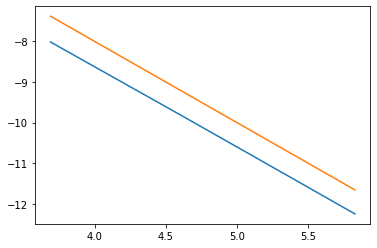

In [95]:
# test erreur explicite dt=CFL h**2
#on doit trouver une erreur d'ordre 2 en h, soit d'ordre 1 en dt
L=2
T=0.5 # temps final
CFL=0.99
errtab=[]
Ntab=[]
for N in range(40,400,60):
    h=L/(N+1)
    dt=CFL*0.5*h**2
    Ntab.append(N)
    errtab.append(erreur_linfini(L,fex,uex,T,dt,N,'explicite'))
plot(log(Ntab),log(errtab),log(Ntab),-2*log(Ntab))
print("l'ordre de la méthode en h est :",-polyfit(log(Ntab),log(errtab), 1)[0])

nombre d iterations 50
nombre d iterations 65
nombre d iterations 80
nombre d iterations 95
nombre d iterations 110
nombre d iterations 125
nombre d iterations 140
l'ordre de la méthode en h est : 0.9868057001641746


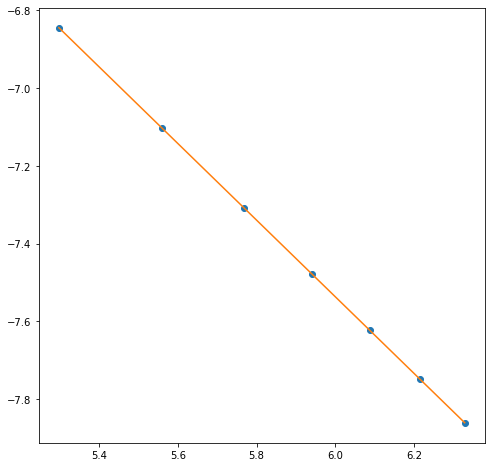

In [96]:
# test erreur implicite dt=h
#on doit trouver une erreur d'ordre 1 en h, car d'ordre 1 en dt
L=2
T=0.5 # temps final
errtab=[]
Ntab=[]
figure(figsize=(8,8))
for N in range(200,600,60):
    h=L/(N+1)
    dt=h
    Ntab.append(N)
    errtab.append(erreur_linfini(L,fex,uex,T,dt,N,'implicite'))
plot(log(Ntab),log(errtab),'o')
plot(log(Ntab),polyfit(log(Ntab),log(errtab), 1)[0]*log(Ntab)+polyfit(log(Ntab),log(errtab), 1)[1])
print("l'ordre de la méthode en h est :",-polyfit(log(Ntab),log(errtab), 1)[0])

L'erreur d'ordre 1 en $h$ est exlusivement liée à l'approximation d'ordre 1 en temps avec $\delta t =h$.

<font size="4">
    
### Schéma de Cranck-Nickolson
Ce schéma en temps, pour l'équation de la chaleur 1D sans terme source, s'écrit,
$$
\begin{align}
&\frac {V^{n+1}-V^{n}}{\delta t}+A \frac {V^{n}+V^{n+1}}{2}=0,\\
&V^0=(v_0(x_1),\cdots,v_0(x_N))^t,
\end {align}
$$
avec la matrice $A$ définie précédemment pour la disctrétisation spatiale par différence finie. 
#### Ordre du schéma
Montrer que ce schéma est d'ordre 2 en temps et en espace.

Le terme $\frac {V^{n+1}-V^{n}}{\delta t}$ est une approximation différence finie centrée au temps $t_{n+\frac 1 2}=\frac {t_n+t_{n+1}}{2}$ de $\partial_t V$. L'erreur sur ce terme est donc en $\mathcal O(\delta t^2)$.

Le terme $\frac {V^{n}+V^{n+1}}{2}$ approche $V(t_{n+\frac  1 2 })$, en effet,
$$
V(t_n)=V(t_{n+\frac  1 2 })-\frac {\delta t}{2}\partial_tV(t_{n+\frac  1 2 })+\mathcal O(\delta t^2),
$$
$$V(t_{n+1})=V(t_{n+\frac  1 2 })+\frac {\delta t}{2}\partial_tV(t_{n+\frac  1 2 })+\mathcal O(\delta t^2),
$$
en sommant, on obtient,
$$
V(t_n)+V(t_{n+1})=2V(t_{n+\frac  1 2 })+\mathcal O(\delta t^2).
$$
On peut ainsi conclure que le schéma de Cranck-Nickolson est d'ordre 2 en temps. Par ailleurs, l'approximation différence finie centrée en espace de l'opérateur de Dirichlet est d'ordre 2 en espace. D'où l'approximation d'ordre 2 en temps et en espace avec ce schéma.</font>

<font size="4">

#### Stabilité
Montrer que ce schéma est inconditionellement stable $l^2(\mathbb R^N)$.

On prend le produit scalaire de $\mathbb R^N$, noté $(.,.)$, entre l'expression du schéma et $\frac {V^{n}+V^{n+1}}{2}$ pour exploiter le fait que la matrice $A$ est définie positive ($(AV,V)\ge 0$).

On obtient alors 
$$
\left (\frac {V^{n+1}-V^{n}}{\delta t},\frac {V^{n}+V^{n+1}}{2}\right )\le 0.
$$
En développant le produit scalaire, on en déduit que, pour tout $\delta t>0$,
$$
\| V^{n+1}\|^2\le \| V^{n}\|^2.
$$
La décroissance de la norme Euclidienne garantit la A-stabilité in conditionnelle du schéma pour cette norme.</font>

<font size="4">

#### Mise en oeuvre
Mettre en oeuvre ce schéma pour $v_0=\chi_{[\frac L 3, \frac L 2]}$.
Qu'observe-t-on pour de grand pas de temps au voisinage des discontinuités de la donnée initiale? Cela contredit-il le résultat de stabilité?

Vérifier l'ordre de la méthode pour une donnée initiale régulière de votre choix.

On va d'abord vérifier l'ordre 2 en temps et en espace en liant $\delta t=h$.
    
</font>

In [97]:
def erreur_CN_linfini(L,f,u,T,dt,N):
    h=L/(N+1)
    x=linspace(h,L-h,N)
    #construction de la matrice en systeme creux
    D0=(2/h**2)*ones(N)
    D1=-1/h**2*ones(N)
    A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
    A=.5*A
    M=spdiags(ones(N),[0],N,N)/dt+A
    #donnee initiale
    U=u(0,x,L)# donnee intiale
    #boucle en temps
    print('nombre d iterations',int(T/dt))
    err=0
    for n in range(int(T/dt)):
        t=n*dt
        F=f(t+dt/2,x,L)
        SM=F-A@U+U/dt
        U=spsolve(M,SM)    
        err=max(err,max(abs(U-u(t+dt,x,L)))/max(abs(U)))
    return err


nombre d iterations 25
nombre d iterations 40
nombre d iterations 55
nombre d iterations 70
nombre d iterations 85
nombre d iterations 100
nombre d iterations 115
nombre d iterations 130
nombre d iterations 145
l'ordre de la méthode en h=dt est : 1.989994642694513


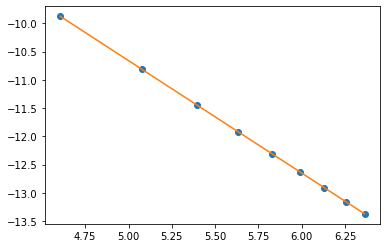

In [98]:
# test erreur implicite dt=h
#on doit trouver une erreur d'ordre 1 en h, car d'ordre 1 en dt
L=2
T=0.5 # temps final
errtab=[]
Ntab=[]
for N in range(100,600,60):
    h=L/(N+1)
    dt=h
    Ntab.append(N)
    errtab.append(erreur_CN_linfini(L,fex,uex,T,dt,N))
plot(log(Ntab),log(errtab),'o')
plot(log(Ntab),polyfit(log(Ntab),log(errtab), 1)[0]*log(Ntab)+polyfit(log(Ntab),log(errtab), 1)[1])
print("l'ordre de la méthode en h=dt est :",-polyfit(log(Ntab),log(errtab), 1)[0])

     
On a obtenu une méthode d'ordre 2 avec $\delta t=h$ et sans condition CFL. Ce schéma est donc pertinent pour ce problème. Néanmoins, ceci s'est bien passé car la solution est régulière en temps et en espace (solution analytique choisie $\mathcal C^\infty$ en $(t,x)$). On va mettre en évidence un défaut de ce schéma lorsque la donnée initiale est discontinue et le pas de temps de l'ordre de $h$. Ce schéma s'appuie sur la discrétisation explicite de la diffusion avec le poids $1/2$ et sur la discrétisation implicite de la diffusion avec le poids $1/2$. Si le poids sur l'explicite dépasse $1/2$, une condition CFL du type de celle du schéma d'Euler explicite apparaît. Le schéma de Cranck-Nickolson est ainsi en limite de stabilité inconditionnelle et on va l'observer sur l'exemple proposé avec une donnée initiale discontinue.


nombre d iterations 2013


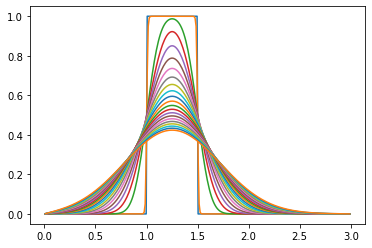

In [99]:
L=3
T=0.1
N=300
h=L/(N+1)
dt=0.5*h**2 # pas d'artefact avec ce dt
#dt=h # artefact avec ce dt mais le schema est L2 stable!
x=linspace(h,L-h,N)
#construction de la matrice en systeme creux
D0=(2/h**2)*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
A=.5*A
M=spdiags(ones(N),[0],N,N)/dt+A
M.tocsr()
#donnee initiale
U=zeros(N)# donnee intiale
U[int(N/3):int(N/2)]=1
#boucle en temps
print('nombre d iterations',int(T/dt))
err=0
plot(x,U)
for n in range(int(T/dt)):
    t=n*dt
    SM=-A@U+U/dt
    U=spsolve(M,SM) 
    if (n%100==0) :
        plot(x,U);

nombre d iterations 10


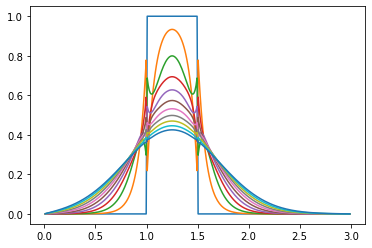

In [101]:
L=3
T=0.1
N=300
h=L/(N+1)
dt=0.5*h**2 # pas d'artefact avec ce dt
dt=h # artefact avec ce dt mais le schema est L2 stable!
x=linspace(h,L-h,N)
#construction de la matrice en systeme creux
D0=(2/h**2)*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
A=.6*A
M=spdiags(ones(N),[0],N,N)/dt+A
#donnee initiale
U=zeros(N)# donnee intiale
U[int(N/3):int(N/2)]=1
#boucle en temps
print('nombre d iterations',int(T/dt))
err=0
plot(x,U)
for n in range(int(T/dt)):
    t=n*dt
    SM=-0.4/0.6*A@U+U/dt
    U=spsolve(M,SM) 
    plot(x,U)

nombre d iterations 40


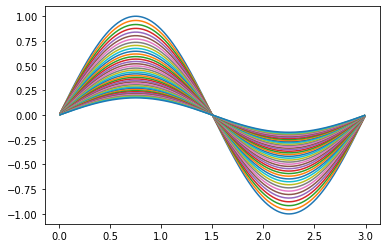

In [32]:
# Une donnée initiale r&gulière et CN ne présente pas d'artéfact
L=3
T=0.4
N=300
h=L/(N+1)
dt=0.5*h**2
dt=h
x=linspace(h,L-h,N)
#construction de la matrice en systeme creux
D0=(2/h**2)*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
A=.5*A
M=spdiags(ones(N),[0],N,N)/dt+A
M=M.tocsr()
#donnee initiale
U=zeros(N)# donnee intiale
U=sin(x*2*pi/L)
#boucle en temps
print('nombre d iterations',int(T/dt))
err=0
plot(x,U)
for n in range(int(T/dt)):
    t=n*dt
    SM=-A@U+U/dt
    U=spsolve(M,SM) 
    plot(x,U);

<font size="4">
    
 Avec un petit pas de temps type CFL du schéma explicite, on a la solution attendue avec régularisation de la solution (initialement discontinue) et la "diffusion" du créneau.

En revanche, le même code avec un pas de temps raisonablement gros fait apparaître les artefacts ci-dessus hérités de la discontinuité. La solution reste stable, convergente en norme $L^2$. Pour une donnée initiale continue, aucun artefact n'apparaît.
    
    
</font>

nombre d iterations 134


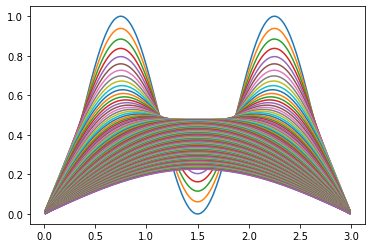

In [59]:
L=3
T=1
N=200
h=L/(N+1)
dt=0.5*h
x=linspace(h,L-h,N)
#construction de la matrice en systeme creux
D0=(2/h**2)*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
A=.5*A
M=spdiags(ones(N),[0],N,N)/dt+A
#donnee initiale
U=zeros(N)# donnee intiale
U[int(N/3):int(N/2)]=1

U=sin(x*2*pi/L)**2
plot(x,U)
#boucle en temps
print('nombre d iterations',int(T/dt))
err=0
for n in range(int(T/dt)):
    t=n*dt
    SM=-A@U+U/dt
    U=spsolve(M,SM) 
    plot(x,U);
#la solution "oublie" sa donnée initiale et la solution tend vers 0 
#en éliminant plus rapidement les hautes fréquences

## Approximation de l'équation de la chaleur 2D
L'objectif ici est d'étendre les simulations numériques obtenues en dimension 1 à la dimension 2 sur un rectangle $\Omega=]0,L[\times]0,H[$.

On va se contenter d'appliquer ici le schéma d'Euler implicite sur le problème de Dirichlet 2D, sans terme source et avec une donnée intiale discontinue.

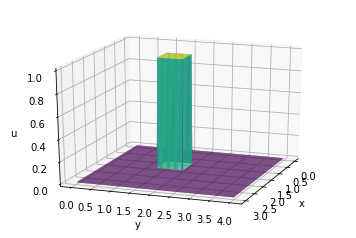

nombre d iterations 6


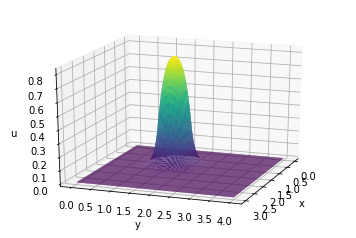

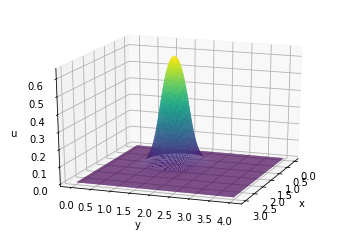

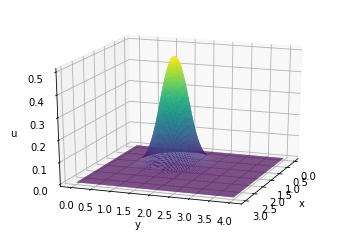

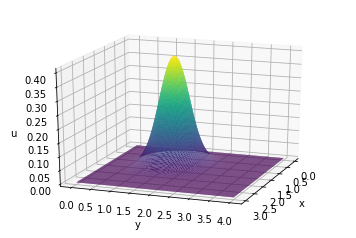

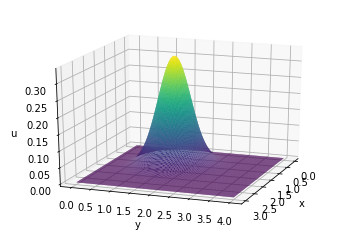

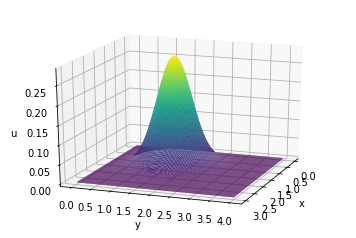

In [123]:
L=3
H=4
T=0.1
N=140
M=130
l=L/(N+1)
h=H/(M+1)
dt=0.5*h
x=linspace(l,L-l,N)
y=linspace(h,H-h,M)
from mpl_toolkits import mplot3d
X, Y = meshgrid(linspace(0,L,N+2),linspace(0,H,M+2))
#construction de la matrice en systeme creux
D0=(1/dt+2/(l**2)+2/(h**2))*ones(N*M)# diagonale principale
D1=-1/l**2*ones(N*M)# surdiagonale
D1[N::N]=0.#correction de la surdiagonale (voisin de droite n existe pas au bord droit)
DM1=-1/l**2*ones(N*M)# sousdiagonale
DM1[N-1::N]=0.#correction de la sousdiagonale (voisin de gauche n existe pas au bord gauche)
DN=-1/h**2*ones(N*M)
A=spdiags(D0,[0],N*M,N*M)+spdiags(D1,[1],N*M,N*M)+spdiags(DM1,[-1],N*M,N*M)
A=A+spdiags(DN,[N],N*M,N*M)+spdiags(DN,[-N],N*M,N*M)
#donnee initiale
Utab=zeros((N,M))# donnee intiale
Utab[int(N/3):int(N/2), int(M/3):int(M/2)]=1
U=reshape(Utab.T,N*M)
uu=Utab.T
uubord=0*ones((M+2,N+2));
uubord[1:M+1,1:N+1]=uu;
#print(A.toarray())

ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, uubord, 50, cmap='binary')
ax.plot_surface(X, Y, uubord, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');
ax.view_init(20, 20)
show()
#boucle en temps
print('nombre d iterations',int(T/dt))
for n in range(int(T/dt)):
    t=n*dt
    SM=U/dt
    U=spsolve(A,SM) 
    # representation graphique de la solution
    if (n%1==0):
        uu=reshape(U,(M,N))
        uubord=0*ones((M+2,N+2));
        uubord[1:M+1,1:N+1]=uu;
        #print(A.toarray())

        ax = plt.axes(projection='3d')
        ax = plt.axes(projection='3d')
        #ax.contour3D(X, Y, uubord, 50, cmap='binary')
        ax.plot_surface(X, Y, uubord, rstride=1, cstride=1,
                        cmap='viridis', edgecolor='none');
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('u');
        ax.view_init(20, 20)
        show()

<font size="4">

## Le problème de Stokes instationnaire

Ce problème parabolique reprend la même structure que l'équation de la chaleur sauf qu'il s'ajoute une contrainte au problème, l'incompressibilité, qui induit comme en stationnaire l'apparition d'une pression dans l'équation pour satisfaire la contrainte:
$$
\begin{cases}
&    \partial_t {\bf u}(t,{\bf x})-\mu \Delta {\bf u}(t,{\bf x}) + \nabla {p}(t,{\bf x}) ={\bf f} (t,{\bf x}), \quad (t,{\bf x})\in ]0,T[\times\Omega,\\
&\nabla \cdot {\bf u}(t,{\bf x}) =0, \quad (t,{\bf x})\in ]0,T[\times\Omega,\\
& {\bf u}(t,{\bf x})= 0 , \quad (t,{\bf x})\in ]0,T[\times\partial \Omega,\\
& {\bf u}(0,{\bf x})= {\bf u}_0({\bf x}) , \quad {\bf x}\in  \Omega.
\end {cases}
$$
Formellement, si on prend le produit scalaire $L^2(\Omega)$ de la première equation avec la solution elle-même ${\bf u}$, on obtient 
$$
\frac 1 2 \frac d {dt}\|{\bf u}(t,.)\|^2+\mu \|\nabla{\bf u}(t,.)\|^2+0\le \|{\bf f}(t,.)\|\|{\bf u}(t,.)\|.
$$
On retrouve ainsi la même estimation d'énergie que pour l'équation de la chaleur et on conclut à la borne de ${\bf u}$ dans $L^2(0,T;V)\cap L^\infty(0,T,(L^2(\Omega))^d)$ sous quelques hypothèses sur ${\bf f}$, avec $V=\{ {\bf v}\in (H_0^1(\Omega))^d, ~\nabla \cdot{\bf v}=0   \}$.

**Exercice**: Démontrer que si ${\bf f}$ ne dépend pas de $t$ alors la solution de ce problème converge vers la solution de Stokes stationnaire dans $(L^2(\Omega))^d$ lorsque $t$ tend vers l'infini.

### Schéma implicite
Comme pour l'équation de la chaleur, un implicitation pourra conduire à un schéma inconditionnellement A-stable pour la norme $(L^2(\Omega))^d$ et motive le choix de ce schéma :
$$
    \begin{cases}
&   \frac {{\bf u}^{n+1}-{\bf u}^{n}} {\delta t} -\mu \Delta {\bf u}^{n+1} + \nabla {p}^{n+1} =f^{n+1} \text{ dans } \Omega,\\
&\nabla \cdot {\bf u}^{n+1} =0\text{ dans } \Omega,\\
& {\bf u}^{n+1}= 0 \text{ sur } \partial \Omega,\\
&{\bf u}^{0}=u_0  \text{ dans } \Omega.
    \end {cases}
$$
Cette suite est bien définie comme solution d'un problème elliptique (l'ellipticité de l'opérateur est renforcée par le terme $\frac {{\bf u}^{n+1}} {\delta t}$ par rapport au problème de Stokes stationnaire).

Pour prouver la stabilité $(L^2(\Omega))^d$ inconditionnelle, on prend le produit scalaire $(L^2(\Omega))^d$ du schéma avec ${\bf u}^{n+1}$. On présente le calcul dans le cas simplifié de l'absence de terme source qui s'obtient lorsque le terme source ne dépend pas de $t$ et qu'on a retranché la solution de Stokes stationnaire. On étudie alors  ${\bf v}^{n+1}={\bf u}^{n+1}-{\bf u}$ que l'on notera encore ${\bf u}^{n+1}$. On obtient :
$$
\frac 1 {\delta t }\| {\bf u}^{n+1}\|^2+\| \nabla {\bf u}^{n+1}\|^2\le \frac 1 {\delta t }\| {\bf u}^{n}\|\| {\bf u}^{n+1}\|.
$$
On conclut comme pour l'équation de la chaleur : la suite $(\| {\bf u}^{n}\|)_n$ est géomtriquement décroissante vers $0$ grâce à l'inégalité de Poincaré.

On peut résoudre à chaque itération ce problème elliptique comme on peut résoudre le problème de Stokes stationnaire, par exemple avec l'algorithme d'Uzawa. Cependant, il est plus pertinent de proposer un schéma qui exploite la petitesse du pas de temps pour suivre l'évolution transitoire de l'écoulement. On pense alors aux méthodes de splitting. 

### Méthode de prédiction - correction ou projection    

Le splitting, originellement introduit par Chorin et Chorin-Temam est le suivant :

On résout sur un pas de temps :
 $$
    \begin{cases}
&    \partial_t {\bf u}_1(t,{\bf x})-\mu \Delta {\bf u}_1(t,{\bf x}) ={\bf f} (t,{\bf x}), \quad (t,{\bf x})\in ]0,\delta t[\times\Omega,\\
& {\bf u}_1(t,{\bf x})= 0 , \quad (t,{\bf x})\in ]0,\delta t[\times\partial \Omega,\\
& {\bf u}_1(0,{\bf x})= {\bf u}_0({\bf x}) , \quad {\bf x}\in  \Omega.
    \end {cases}
$$
Puis sur le même temps $\delta t$, on résout :
 $$
    \begin{cases}
&    \partial_t {\bf u}_2(t,{\bf x}) + \nabla {p}(t,{\bf x}) =0, \quad (t,{\bf x})\in ]0,\delta t[\times\Omega,\\
&\nabla \cdot {\bf u}_2(t,{\bf x}) =0, \quad (t,{\bf x})\in ]0,\delta t[\times\Omega,\\
& {\bf u}_2(t,{\bf x})\cdot {\bf n} = 0 , \quad (t,{\bf x})\in ]0,T[\times\partial \Omega,\\
& {\bf u}_2(0,{\bf x})= {\bf u}_1(\delta t,{\bf x}) , \quad {\bf x}\in  \Omega.
    \end {cases}
$$
La première équation est une classique équation de la chaleur qui sera discrétisée en implicite. La deuxième équation est singulière, puisque ${\bf u}_2$ n'est pas à divergence nulle à $t=0$ et doit le devenir ensuite. La discrétisation de cette équation va conduite à corriger cette divergence sur une itération, voici le schéma proposé en temps:
$$\begin{cases}
& \frac {{\bf u}_2(\delta t,{\bf x})-{\bf u}_2(0,{\bf x})}{\delta t}+ \nabla {p}(\delta t,{\bf x}) =0,\quad {\bf x}\in \Omega\\
&\nabla \cdot {\bf u}_2(\delta t,{\bf x}) =0,\quad {\bf x}\in \Omega\\
& {\bf u}_2(t,{\bf x})\cdot {\bf n} = 0, \text{ sur }\partial \Omega\\
& {\bf u}_2(0,{\bf x})= {\bf u}_1(\delta t,{\bf x}).
\end {cases}
$$
Finalement, on reconnaît que ${\bf u}_2(\delta t,{\bf x})$ est le projeté (presque) orthogonal de ${\bf u}_1(\delta t,{\bf x})$ sur les champs à divergence nulle.
De plus, la pression est identifiée comme solution d'un problème de Poisson qui permet de reconstruire ${\bf u}_2$:
$$\begin{cases}
&
\Delta {p}(\delta t,{\bf x}) =\frac 1 {\delta t}\nabla \cdot {\bf u}_1(\delta t,{\bf x}),\quad {\bf x}\in \Omega\\
&\partial_n p(\delta t,{\bf x})=0 , \text{ sur }\partial \Omega.
\end {cases}
$$
Une variante de ce splitting qui peut ensuite être amélioré en terme de précision (ordre en temps) est le suivant: (solution connue à l'itération $n$)

Etape de prédiction :
$$\begin{cases}
& \frac {{\bf u}^{n+1}_1-{\bf u}^{n}}{\delta t}-\mu \Delta {\bf u}^{n+1}_1+ \nabla {p}^{n}=f^{n+1},\quad \text{dans } \Omega\\
& {\bf u}^{n+1}_1= 0, \text{ sur }\partial \Omega,
\end {cases}
$$
Etape de correction :
$$\begin{cases}
& \frac {{\bf u}^{n+1}-{\bf u}^{n+1}_1}{\delta t}+ \nabla ({p}^{n+1}-{p}^{n}) =0,\quad \text{dans } \Omega\\
&\nabla \cdot {\bf u}^{n+1} =0,\quad \text{dans } \Omega\\
& {\bf u}^{n+1}\cdot {\bf n} = 0, \text{ sur }\partial \Omega,
\end {cases}
$$
ce qui induit :
$$\begin{cases}
&
\Delta ({p}^{n+1}-{p}^{n}) =\nabla \cdot {\bf u}^{n+1}_1,\quad \text{dans } \Omega\\
&\partial_n p^{n+1}=0 , \text{ sur }\partial \Omega.
\end {cases}
$$
En sommant les deux systèmes de prédiction et correction, on trouve :
$$\begin{cases}
& \frac {{\bf u}^{n+1}-{\bf u}^{n}}{\delta t}-\mu \Delta {\bf u}^{n+1}_1+ \nabla {p}^{n+1}=f^{n+1},\quad \text{dans } \Omega\\
&\nabla \cdot {\bf u}^{n+1} =0,\quad \text{dans } \Omega\\
& {\bf u}^{n+1}\cdot {\bf n} = 0, \text{ sur }\partial \Omega
\end {cases}$$
On a presque retrouvé le système implicite, seul le terme visqueux diffère un peu et induit une approximation d'ordre 1 en temps du fait du splitting qui est du même ordre d'approximation que le schéma d'Euler implicite. Pour monter en ordre, il faudra un schéma en temps plus précis ainsi qu'un splitting plus précis.</font>